In [1]:
savepath = "AutoML_Results_HPC"
save_figs_folder = "Figures"

import os
if not os.path.exists(save_figs_folder):
    os.makedirs(save_figs_folder)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
import seaborn as sns
import matplotlib.pyplot as plt
import dill as pickle
import digen
import os
import glob
from itertools import product



benchmark=digen.Benchmark()
datasets_names = benchmark.list_datasets()

In [3]:
def make_df(results_arr):
    all_df = pd.DataFrame()
    z = pd.DataFrame.from_dict(results_arr).transpose()
    z.drop('name', inplace=True)
    z['pipeline'] = z['classifier']
    #z['classifier'] = "{0}_{1}".format(new_results['name'],i)
    z['classifier'] =  results_arr['name']
    all_df = all_df.append(z)
    all_df.reset_index(inplace=True)
    return all_df

In [4]:
palette = {   
                'TPOT_C'   :   "#DE8F05" ,
                'TPOT_STC'  :    "#029E73",
                'TPOT_Base'    :   "#D55E00" ,

                'Auto-Sklearn'   :   "#FBAFE4",
                'Auto-Sklearn 2':   "#CC78BC",

                'H2O':   "#0173B2",

                'MLPClassifier':   "#b4acc5",
                'XGBClassifier':   "#b4acc5",
                'GradientBoostingClassifier':   "#b4acc5",
                'LGBMClassifier':   "#b4acc5",
                'SVC':   "#b4acc5",
                'RandomForestClassifier':   "#b4acc5",
                'KNeighborsClassifier':   "#b4acc5",
                'DecisionTreeClassifier':   "#b4acc5",
                'LogisticRegression':   "#b4acc5",
                
                'Best Optuna' : 'black',
}

In [5]:


automl_experiments = [

                    # {
                    # 'automl': 'tpot',
                    # 'exp_name' : 'tpot_STC_3600s',
                    
                    # },

                    # {
                    # 'automl': 'tpot',
                    # 'exp_name' : 'tpot_C_3600s',
                    
                    # },

                    

                    # {
                    # 'automl': 'tpot',
                    # 'exp_name' : 'tpot_base_3600s',
                    
                    # },

                    # {
                    # 'automl': 'h2o',
                    # 'exp_name' : 'h2o_3600s',
                    
                    # },

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_STC_1200s',
                    
                    },

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_C_1200s',

                    },

                    

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_base_1200s',
                    
                    },

                    {
                    'automl': 'h2o_old',
                    'exp_name' : 'h2o_1200s',
                    },

                    {
                    'automl': 'autosklearn',
                    'exp_name' : 'autosklearn_3600s',
                    
                    },

                    {
                    'automl': 'autosklearn2',
                    'exp_name' : 'autosklearn2_3600s',
                    
                    },

                    {
                    'automl': 'autosklearn',
                    'exp_name' : 'autosklearn_1200s',
                    
                    },

                    {
                    'automl': 'autosklearn2',
                    'exp_name' : 'autosklearn2_1200s',
                    
                    },
        ]

In [6]:
#Load the Results
def load_results(results_files_paths, name=None):
    results_arr = []
    for i,results_file in enumerate(results_files_paths):
        if os.path.exists(os.path.join(results_file,"results.pkl")):
            results=pickle.load(open(os.path.join(results_file,"results.pkl"),"rb"))
            
            results_arr.append(results)
    
    return results_arr

In [7]:
convert_names = {
    'tpot_STC_1200s'   : 'TPOT_STC'   ,
    'tpot_C_1200s'    : 'TPOT_C'    ,
    'tpot_base_1200s'   : 'TPOT_Base'   ,
    'h2o_1200s'         : 'H2O'         ,
    'autosklearn_1200s'  : 'Auto-Sklearn'  ,
    'autosklearn2_1200s'  : 'Auto-Sklearn 2'  ,
}

In [8]:
all_results_dict = {}
for exp in automl_experiments:
    results_arr= load_results(sorted(glob.glob(os.path.join(savepath,"digen_results",exp["automl"],exp["exp_name"],"**"))),exp["exp_name"] )
    #for result in results_arr:
    #    result['name'] = exp["exp_name"]
    #all_results_dict[exp["exp_name"]] = results_arr
    if exp["exp_name"] in convert_names:
        exp_name = convert_names[exp["exp_name"]]
    else:
        exp_name = exp["exp_name"]
    for result in results_arr:
        result['name'] = exp_name
    all_results_dict[exp_name] = results_arr

In [9]:
all_results_dict['H2O'][0]

{'digen8_4426': {'dataset': 'digen8_4426',
  'classifier': 'H2OAutoMLClassifier',
  'fpr': array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.05, 0.05,
         0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.11, 0.11, 0.12,
         0.12, 0.14, 0.14, 0.16, 0.16, 0.2 , 0.2 , 0.21, 0.21, 0.22, 0.22,
         0.24, 0.24, 0.29, 0.29, 0.46, 0.46, 0.5 , 0.5 , 0.52, 0.52, 0.67,
         0.67, 1.  ]),
  'tpr': array([0.  , 0.01, 0.35, 0.35, 0.43, 0.43, 0.55, 0.55, 0.56, 0.56, 0.63,
         0.63, 0.68, 0.68, 0.7 , 0.7 , 0.79, 0.79, 0.83, 0.83, 0.86, 0.86,
         0.87, 0.87, 0.88, 0.88, 0.89, 0.89, 0.9 , 0.9 , 0.91, 0.91, 0.94,
         0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.99, 0.99,
         1.  , 1.  ]),
  'prec': array([0.5       , 0.50251256, 0.50505051, 0.50761421, 0.51020408,
         0.51282051, 0.51546392, 0.51813472, 0.52083333, 0.52356021,
         0.52631579, 0.52910053, 0.53191489, 0.53475936, 0.53763441,
         0.54054054, 0.54347826, 0.54644809

In [10]:
mlp_full_200 = "digen/examples/mlp.pkl"

result = pickle.load(open(mlp_full_200,"rb"))
result['name'] = "MLPClassifier"
all_results_dict["MLPClassifier"] = [result]

In [15]:
experiments_to_plot_main = ['MLPClassifier','TPOT_C', 'TPOT_STC', 'TPOT_Base', 'H2O', 'Auto-Sklearn'  , 'Auto-Sklearn 2' ]
for exp in experiments_to_plot_main:
    print(exp)
    print(len(all_results_dict[exp]))

MLPClassifier
1
TPOT_C
10
TPOT_STC
10
TPOT_Base
10
H2O
10
Auto-Sklearn
10
Auto-Sklearn 2
10


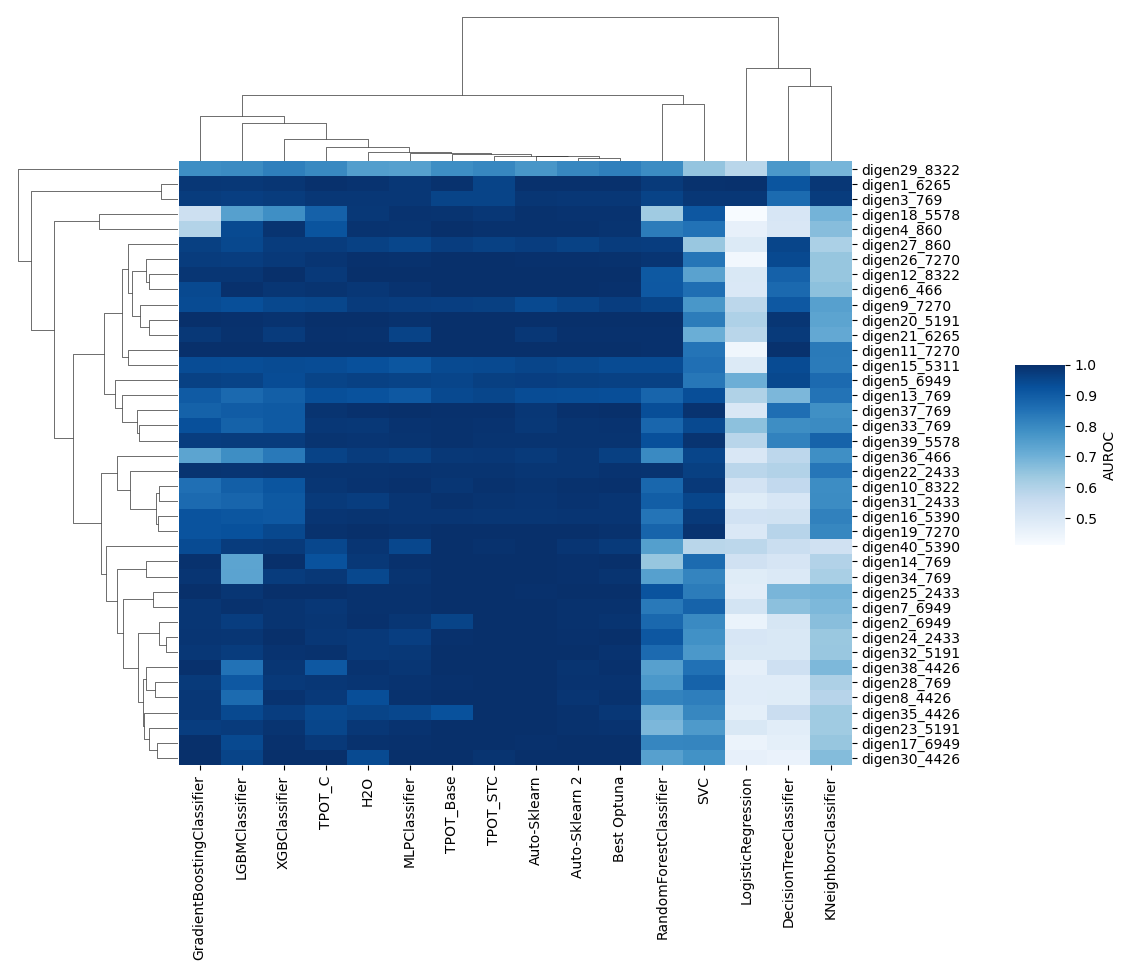

In [16]:


automllist = ['TPOT_C',
                'TPOT_STC',
                'TPOT_Base',
                'Auto-Sklearn' ,
                'Auto-Sklearn 2', 
                'H2O',]

optuna_list = ['MLPClassifier',
                'XGBClassifier',
                'RandomForestClassifier',
                'GradientBoostingClassifier',
                'DecisionTreeClassifier',
                'KNeighborsClassifier',
                'SVC',
                'LGBMClassifier',  
                'LogisticRegression',]

df=benchmark.data[['classifier','dataset','auroc']]
all_df = pd.concat([make_df(all_results_dict[exp_r][0]) for exp_r in experiments_to_plot_main])
all_df = pd.concat([df, all_df])

#piv = benchmark.data.pivot(columns='classifier', index='dataset', values='auroc')
piv = all_df[all_df['classifier'].isin(optuna_list)].pivot(columns='classifier', index='dataset', values='auroc')
optuna_best = piv.max(axis=1).reset_index().rename(columns={0:"auroc"})
optuna_best["classifier"] = "Best Optuna"

all_df = pd.concat([all_df,optuna_best])

all_df = all_df.pivot(columns='classifier', index='dataset', values='auroc')
fig = sns.clustermap(all_df.astype(float), cmap='Blues',
                            yticklabels=1, xticklabels=1, row_cluster=True,
                            #figsize=(7,10),
                            col_cluster=True, annot_kws={"size": 26}, cbar_kws={'label': 'AUROC'})


fig.ax_heatmap.set_xlabel('')
fig.ax_heatmap.set_ylabel('')
#plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

col = fig.cax.get_position()
fig.cax.set_position([col.x0 + 1, col.y0 - 0.35, col.width, col.height])

if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"heatmap_tpot_first_1200s_mlpfull_bestoptuna.svg"))
    fig.savefig(os.path.join(save_figs_folder,"heatmap_tpot_first_1200s_mlpfull_bestoptuna.pdf"))

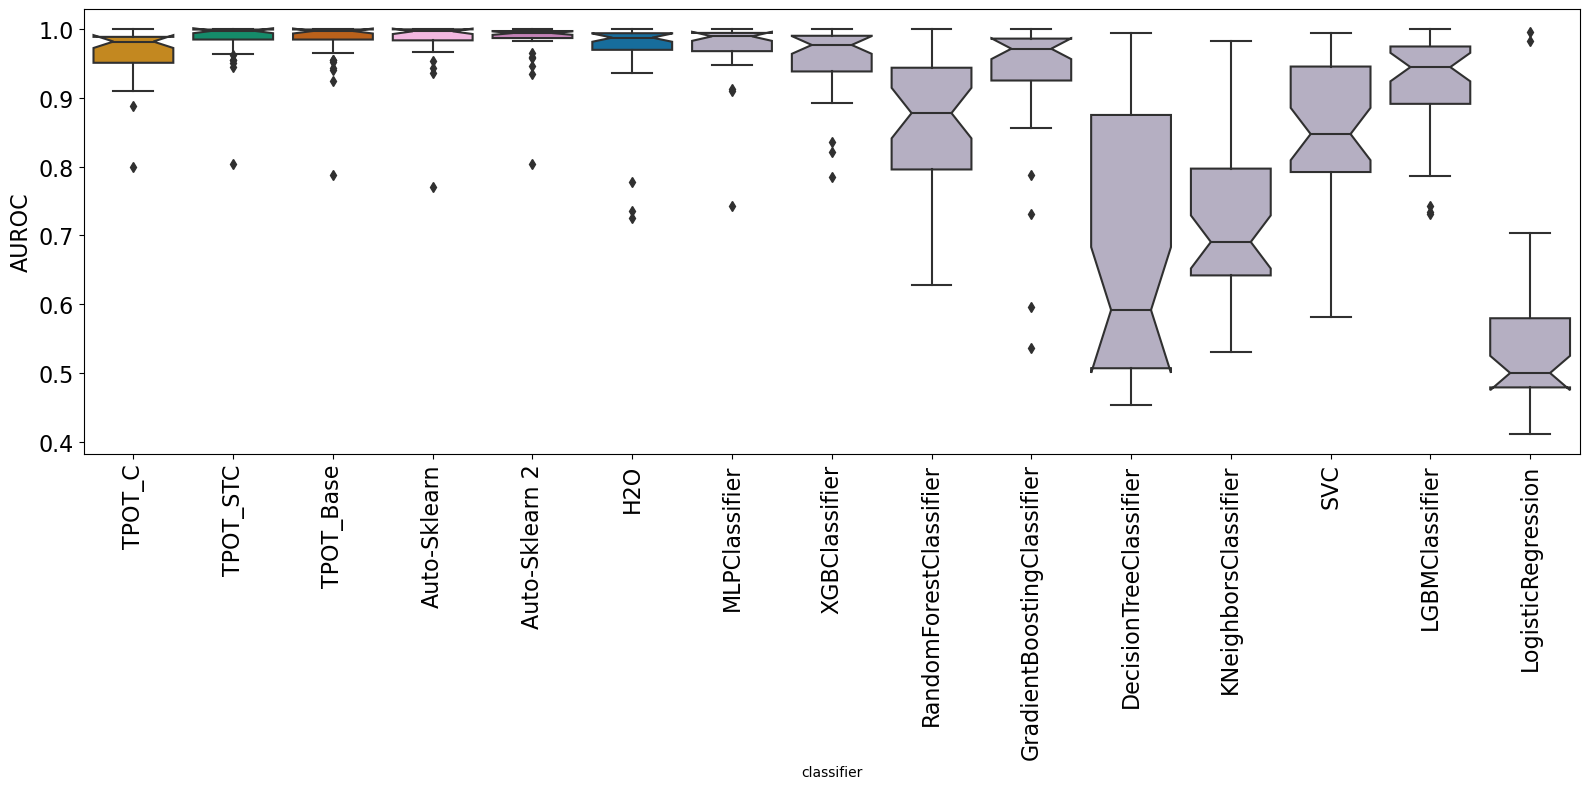

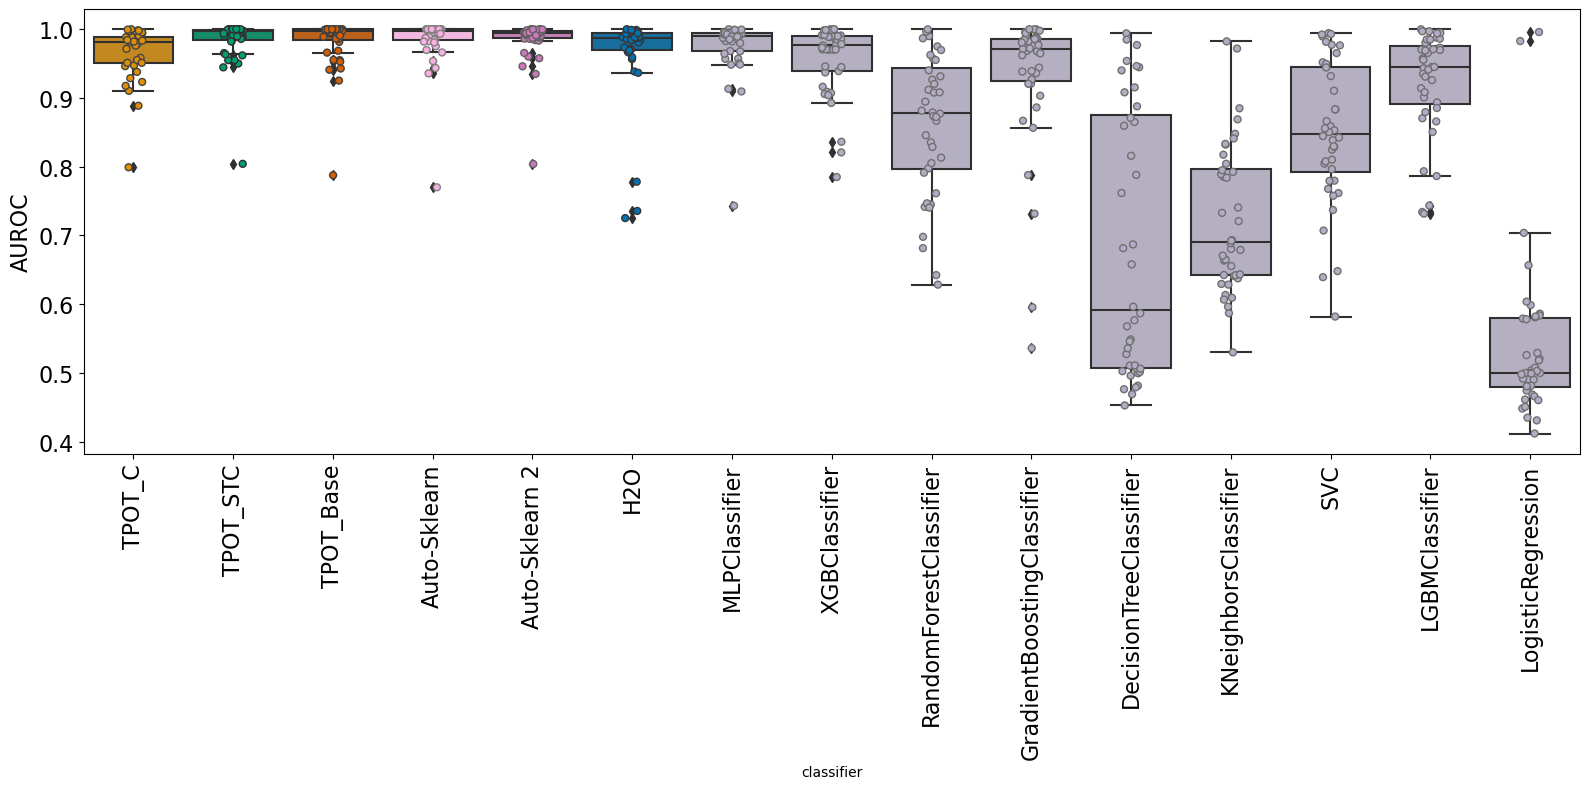

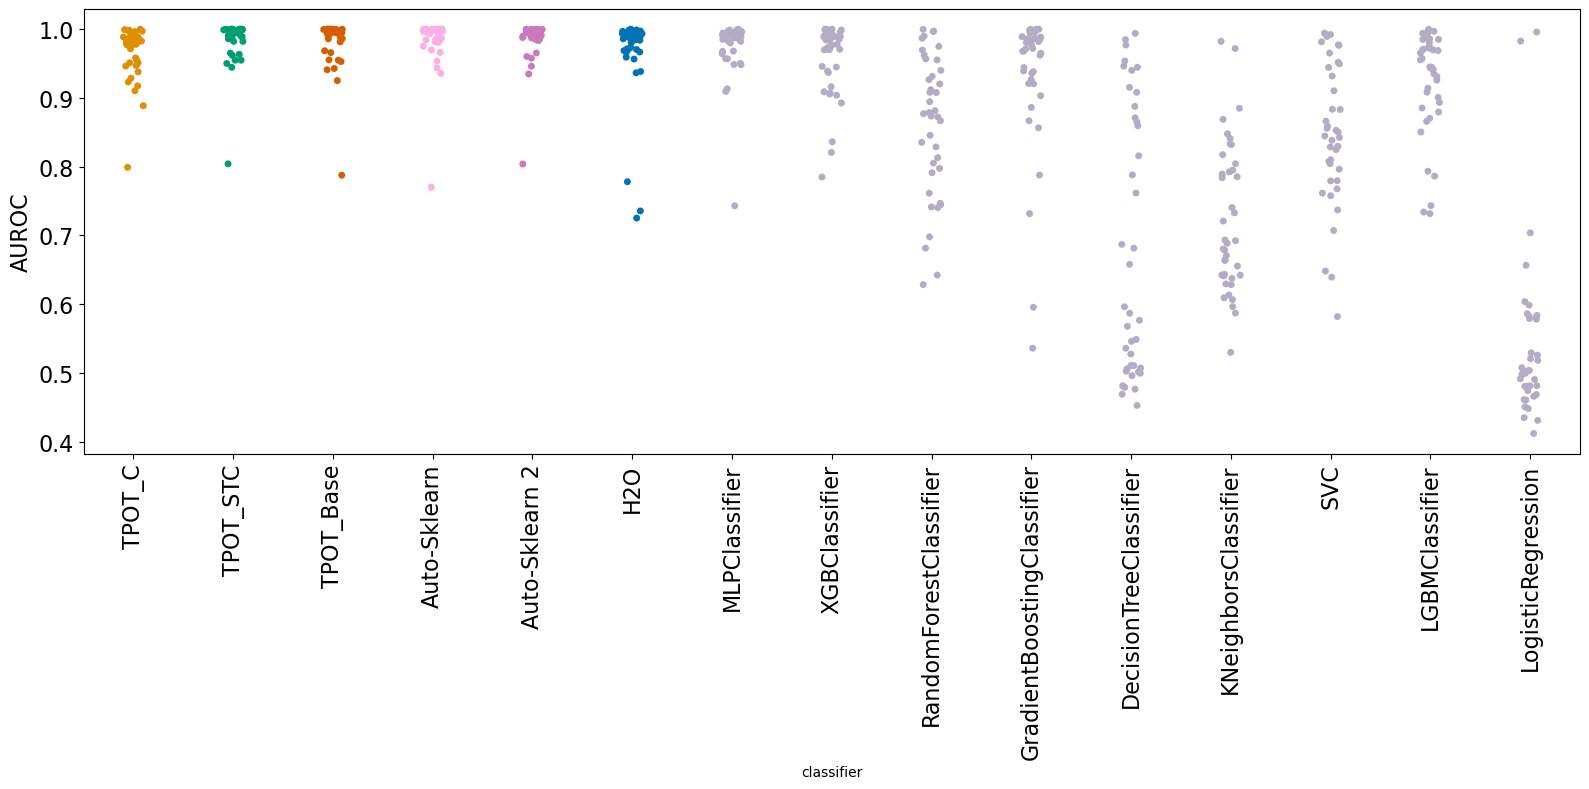

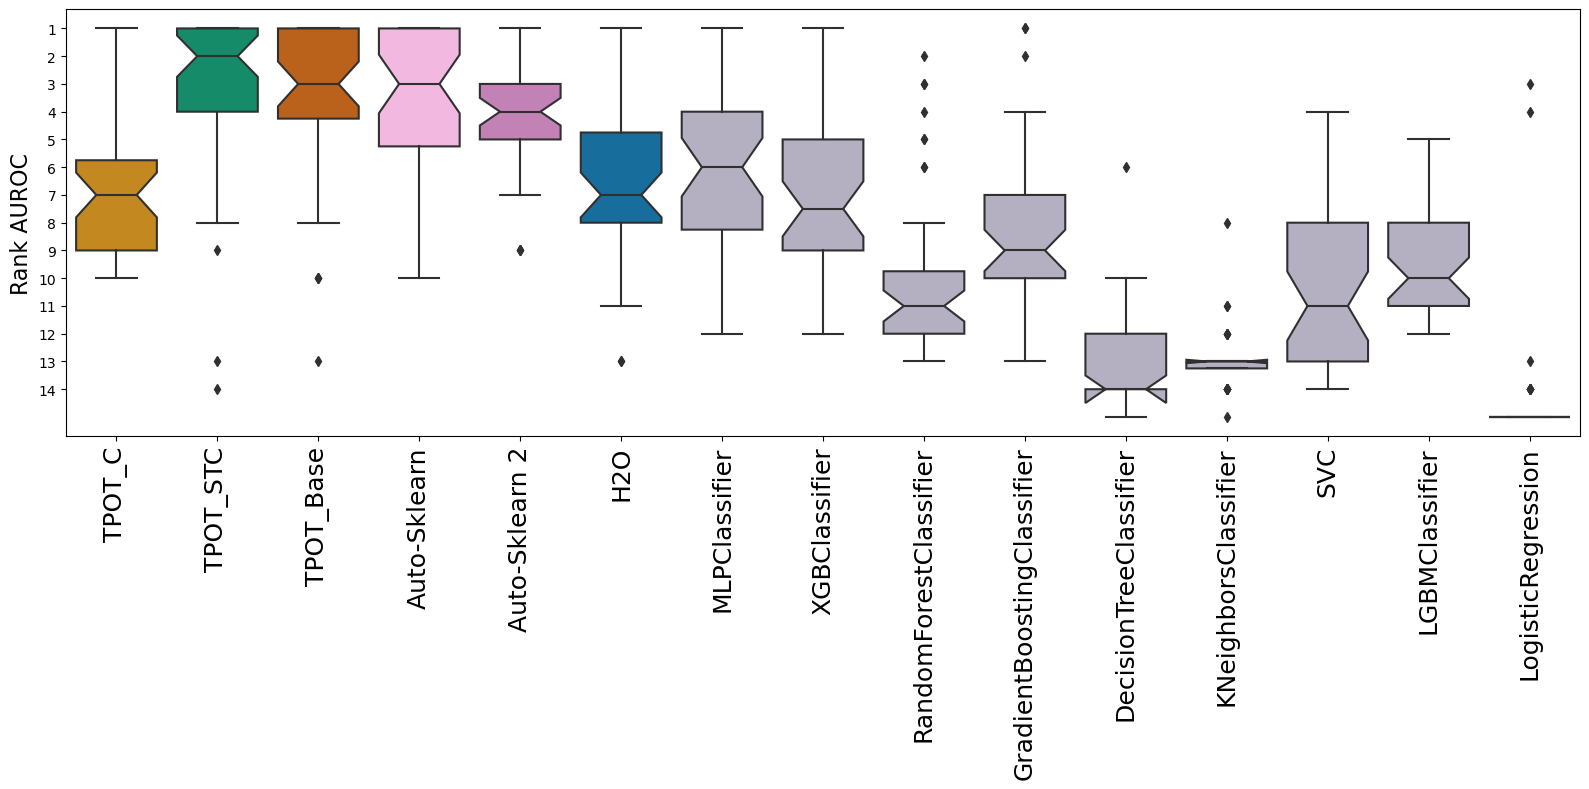

In [12]:
order = [  
                'TPOT_C',
                'TPOT_STC',
                'TPOT_Base',
                'Auto-Sklearn' ,
                'Auto-Sklearn 2', 
                'H2O',
                'MLPClassifier',
                'XGBClassifier',
                'RandomForestClassifier',
                'GradientBoostingClassifier',
                'DecisionTreeClassifier',
                'KNeighborsClassifier',
                'SVC',
                'LGBMClassifier',  
                'LogisticRegression',
]

df=benchmark.data[['classifier','dataset','auroc']]
all_df = pd.concat([make_df(all_results_dict[exp_r][0]) for exp_r in experiments_to_plot_main])
all_df = pd.concat([df, all_df])

fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=all_df , x='classifier', y='auroc', ax=ax, palette=palette, order=order, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.ylabel('AUROC', fontsize=16)
plt.tight_layout()
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_auroc_main.svg"))



fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=all_df , x='classifier', y='auroc', ax=ax, palette=palette, order=order)
ax=sns.stripplot(data=all_df , x='classifier', y='auroc', ax=ax, palette=palette, order=order,  ec='k',linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.ylabel('AUROC', fontsize=16)
plt.tight_layout()
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_auroc_main_stripbox.svg"))



fig,ax = plt.subplots(figsize=(16,8))
ax=sns.stripplot(data=all_df , x='classifier', y='auroc', ax=ax, palette=palette, order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.ylabel('AUROC', fontsize=16)
plt.tight_layout()
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_auroc_main_strip.svg"))


all_df['rank_auroc'] = all_df.groupby(["dataset"])['auroc'].rank(ascending=False, method='min')
fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=all_df , x='classifier', y='rank_auroc', ax=ax, palette=palette,  order=order, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.invert_yaxis()
ax.set_yticks(range(1,15))
plt.ylabel('Rank AUROC', fontsize=16)
plt.xlabel('', fontsize=16)
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_rank_auroc_main.svg"))
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_rank_auroc_main.pdf"))

Text(0, 0.5, 'Rank AUROC')

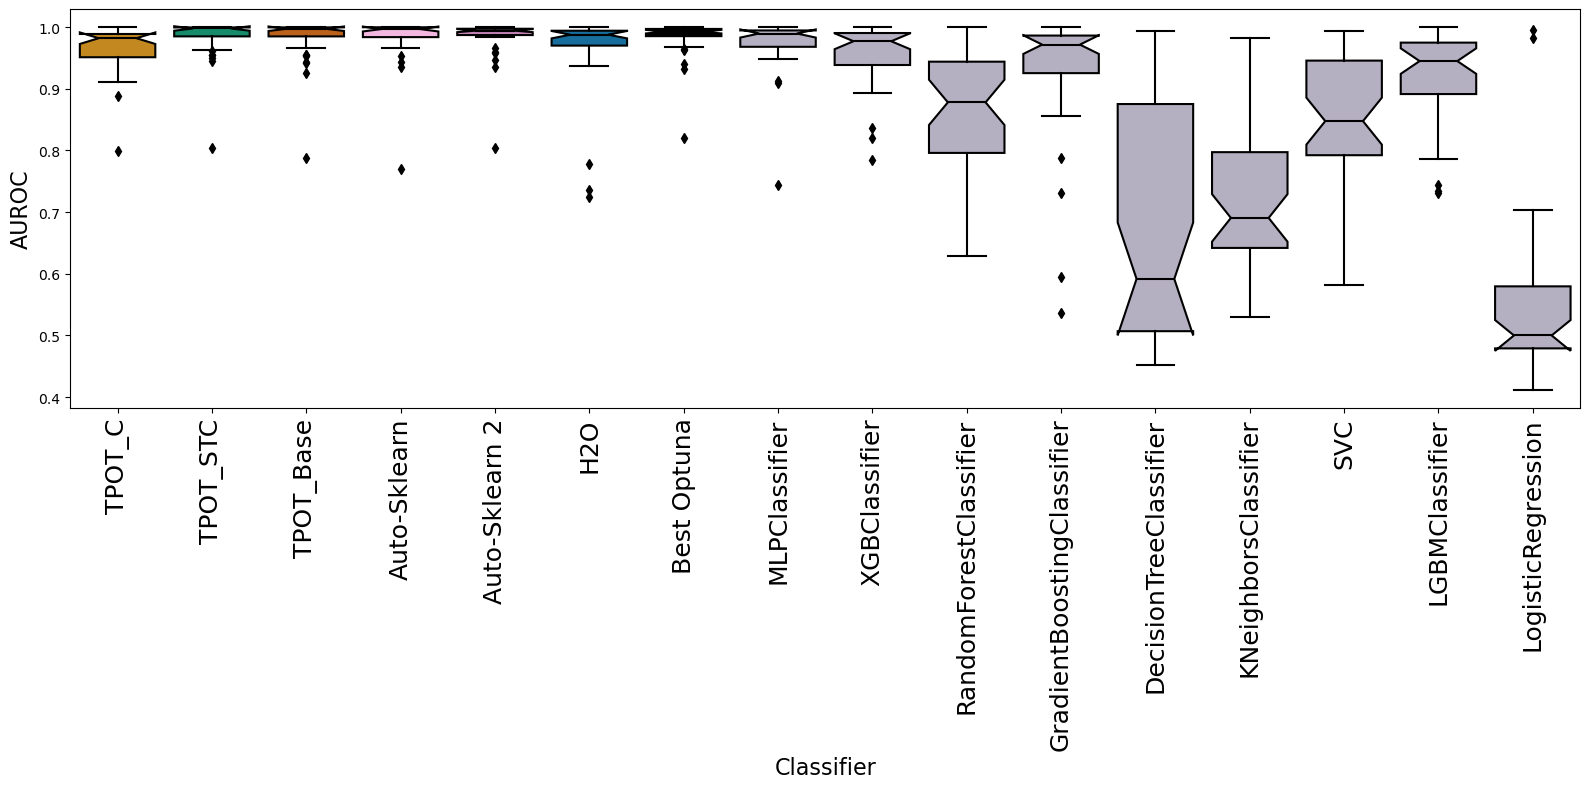

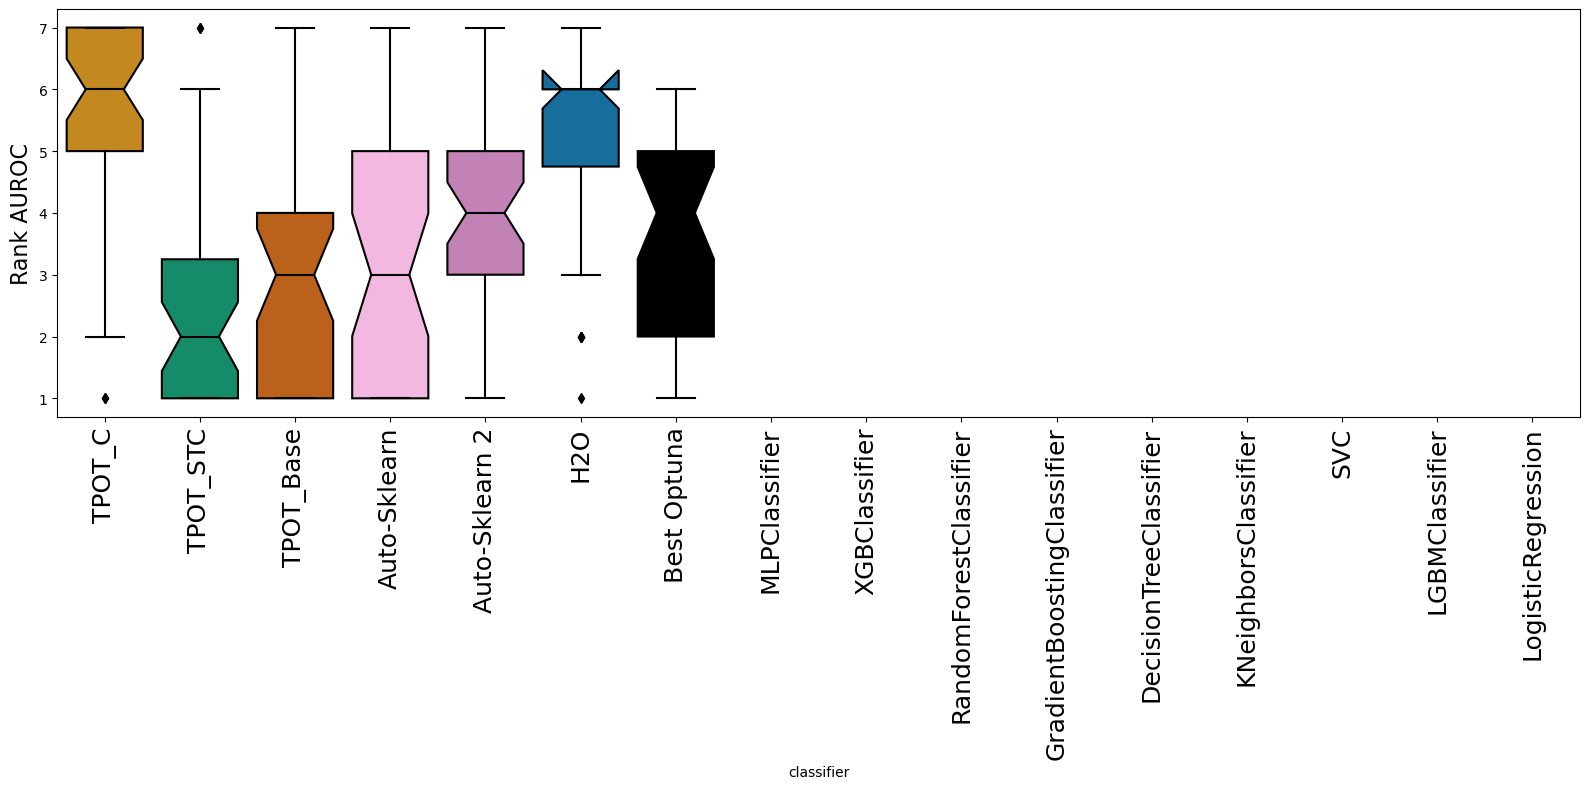

In [13]:
df=benchmark.data[['classifier','dataset','auroc']]
all_df = pd.concat([make_df(all_results_dict[exp_r][0]) for exp_r in experiments_to_plot_main])
all_df = pd.concat([df, all_df])

#piv = benchmark.data.pivot(columns='classifier', index='dataset', values='auroc')
piv = all_df[all_df['classifier'].isin(optuna_list)].pivot(columns='classifier', index='dataset', values='auroc')
optuna_best = piv.max(axis=1).reset_index().rename(columns={0:"auroc"})
optuna_best["classifier"] = "Best Optuna"

all_df = pd.concat([all_df,optuna_best])

order2 = [  
                'TPOT_C',
                'TPOT_STC',
                'TPOT_Base',
                'Auto-Sklearn' ,
                'Auto-Sklearn 2', 
                'H2O',
                'Best Optuna',
                'MLPClassifier',
                'XGBClassifier',
                'RandomForestClassifier',
                'GradientBoostingClassifier',
                'DecisionTreeClassifier',
                'KNeighborsClassifier',
                'SVC',
                'LGBMClassifier',  
                'LogisticRegression',
]



fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=all_df , x='classifier', y='auroc', ax=ax, palette=palette,  order=order2, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
plt.ylabel('AUROC', fontsize=16)
plt.xlabel('Classifier', fontsize=16)
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_auroc_main_best_optuna.svg"))


all_df_automl_best_only = all_df[all_df['classifier'].isin(['TPOT_C',
                                                            'TPOT_STC',
                                                            'TPOT_Base',
                                                            'Auto-Sklearn' ,
                                                            'Auto-Sklearn 2', 
                                                            'H2O',
                                                            "Best Optuna"])]

all_df_automl_best_only['rank_auroc'] = all_df_automl_best_only.groupby(["dataset"])['auroc'].rank(ascending=False, method='min')
fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=all_df_automl_best_only , x='classifier', y='rank_auroc', ax=ax, palette=palette,  order=order2, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
plt.ylabel('Rank AUROC', fontsize=16)

In [14]:
all_df.pivot('dataset', columns='classifier', values='auroc').mean(0).sort_values()

classifier
LogisticRegression        0.538833
DecisionTreeClassifier    0.683036
KNeighborsClassifier      0.723049
SVC                       0.849951
RandomForestClassifier    0.862125
                            ...   
TPOT_Base                 0.982137
Best Optuna               0.983431
Auto-Sklearn              0.983650
Auto-Sklearn 2            0.984232
TPOT_STC                  0.984234
Length: 16, dtype: float64

Text(0.5, 1.0, 'TPOT_STC - Autosklearn 2')

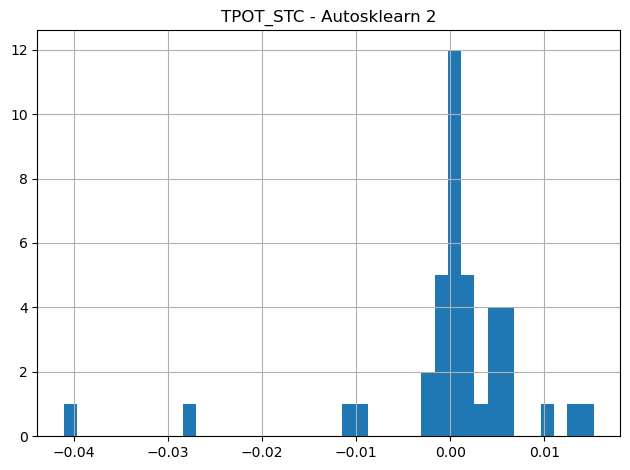

In [15]:
tpotstc = all_df[all_df['classifier'] == "TPOT_STC"].set_index("dataset")
auto2 = all_df[all_df['classifier'] == "Auto-Sklearn 2"].set_index("dataset")
diff = tpotstc["auroc"] - auto2["auroc"]
diff.hist(bins=40)
plt.title("TPOT_STC - Autosklearn 2")

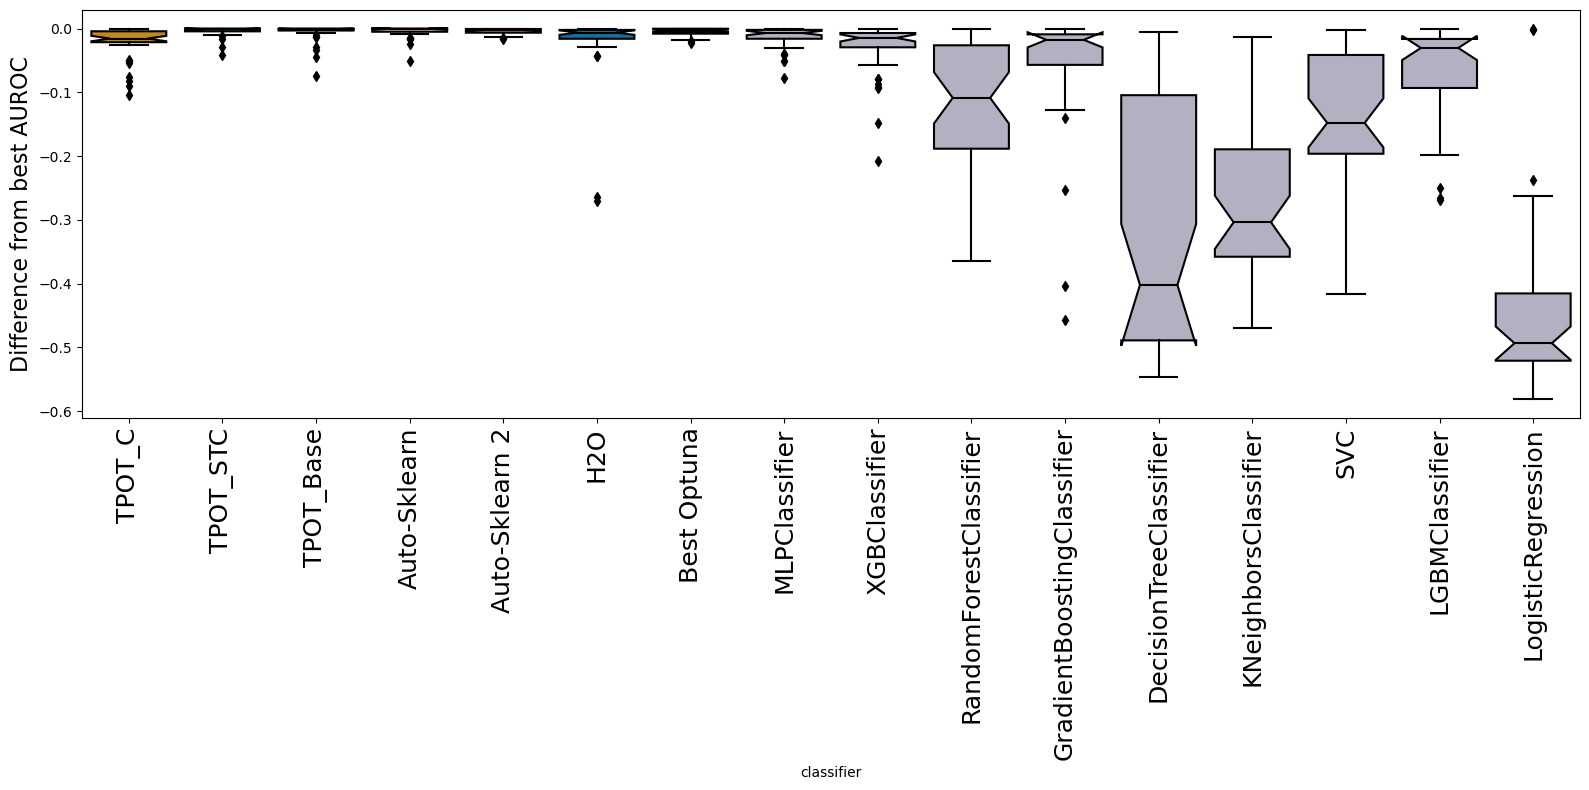

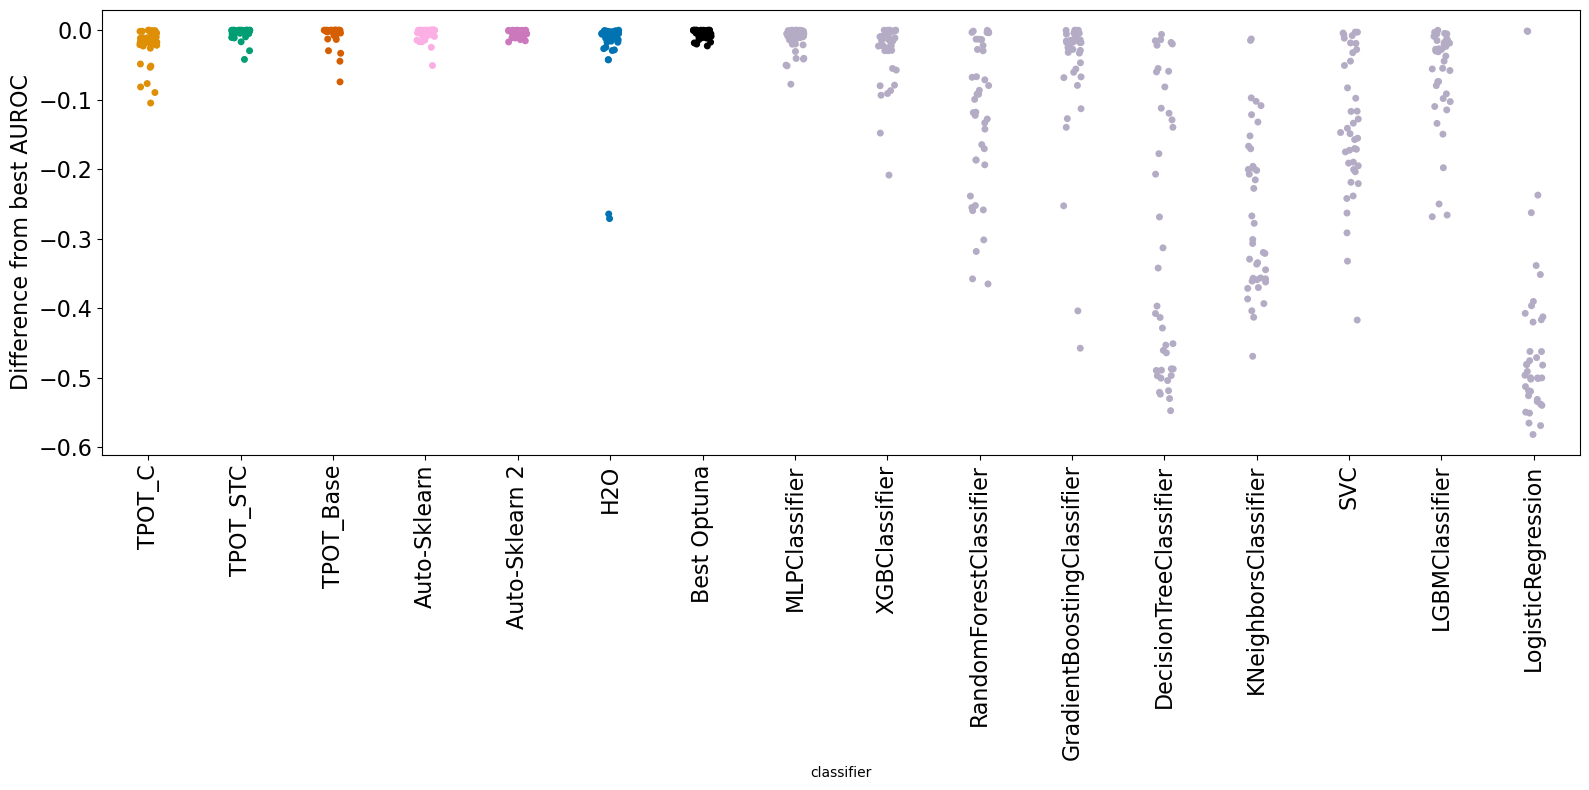

In [16]:
df=benchmark.data[['classifier','dataset','auroc']]
all_df = pd.concat([make_df(all_results_dict[exp_r][0]) for exp_r in experiments_to_plot_main])
all_df = pd.concat([df, all_df])

#piv = benchmark.data.pivot(columns='classifier', index='dataset', values='auroc')
piv = all_df[all_df['classifier'].isin(optuna_list)].pivot(columns='classifier', index='dataset', values='auroc')
optuna_best = piv.max(axis=1).reset_index().rename(columns={0:"auroc"})
optuna_best["classifier"] = "Best Optuna"

all_df = pd.concat([all_df,optuna_best])


piv = all_df.pivot(columns='classifier', index='dataset', values='auroc')
m = piv.max(axis=1)
diffs = piv.subtract(m,axis=0).unstack().reset_index(name="auroc")

fig,ax = plt.subplots(figsize=(16,8))
ax=sns.boxplot(data=diffs , x='classifier', y='auroc', ax=ax, palette=palette,  order=order2, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
plt.ylabel('Difference from best AUROC', fontsize=16)
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"box_all_first_diff_auroc.svg"))

fig,ax = plt.subplots(figsize=(16,8))
ax=sns.stripplot(data=diffs , x='classifier', y='auroc', ax=ax, palette=palette, order=order2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.ylabel('Difference from best AUROC', fontsize=16)
plt.tight_layout()
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"strip_all_first_diff_auroc.svg"))

In [17]:
diffs.pivot('dataset', columns='classifier', values='auroc').mean(0).sort_values()

classifier
LogisticRegression       -0.449914
DecisionTreeClassifier   -0.305710
KNeighborsClassifier     -0.265698
SVC                      -0.138795
RandomForestClassifier   -0.126621
                            ...   
TPOT_Base                -0.006609
Best Optuna              -0.005315
Auto-Sklearn             -0.005096
Auto-Sklearn 2           -0.004514
TPOT_STC                 -0.004512
Length: 16, dtype: float64

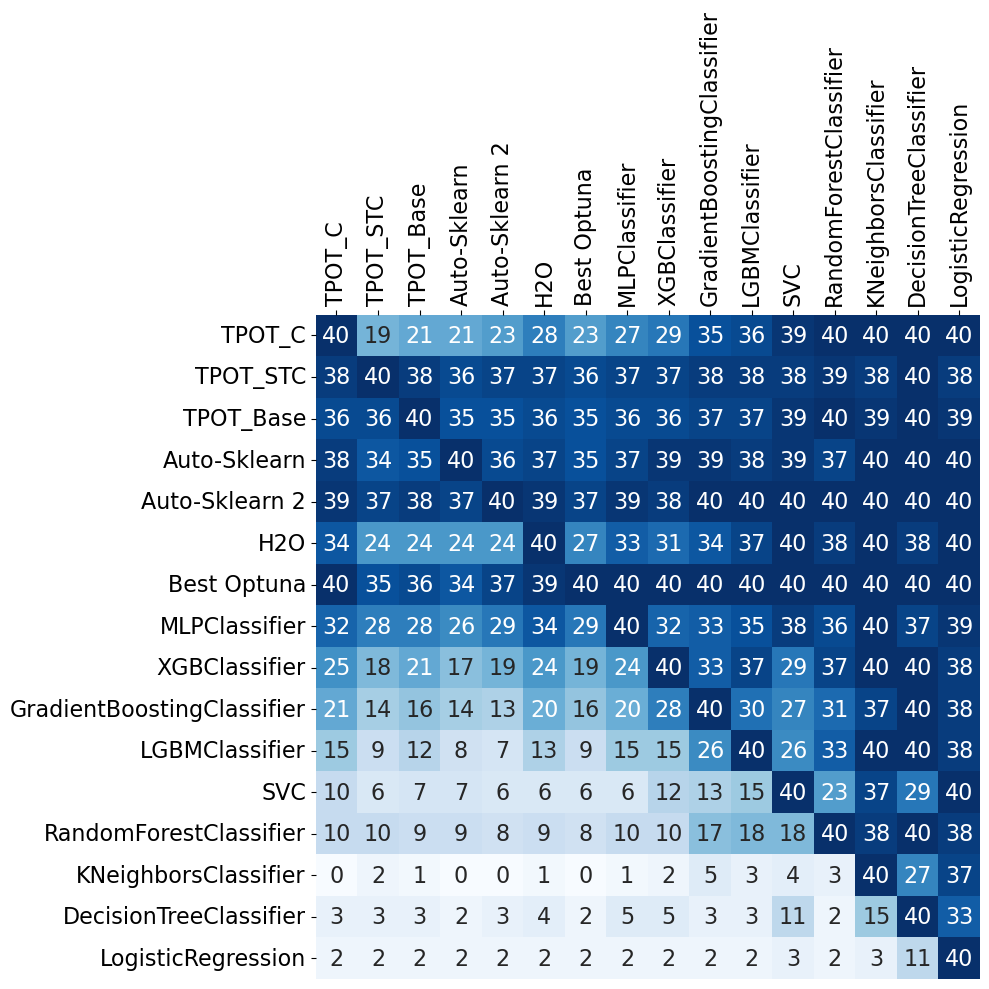

In [18]:


all_df_piv = all_df.pivot('dataset', columns='classifier', values='auroc')

algorithms =[   
                'TPOT_C',
                'TPOT_STC',
                'TPOT_Base',
                'Auto-Sklearn',
                'Auto-Sklearn 2',
                'H2O',
                "Best Optuna",
                'MLPClassifier',
                'XGBClassifier',
                'GradientBoostingClassifier',
                'LGBMClassifier',
                'SVC',
                'RandomForestClassifier',
                'KNeighborsClassifier',
                'DecisionTreeClassifier',
                'LogisticRegression',
                ]
                
wins = pd.DataFrame(index=algorithms, columns=algorithms)

for alg1, alg2 in product(algorithms, algorithms):
    wins.loc[alg1, alg2] = (all_df_piv[alg1] > all_df_piv[alg2]*.99).sum()

    
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=wins.astype(int), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=16)
if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"y_better_than_x_by_0_99p_run_0_best_optuna.svg"))
    fig.savefig(os.path.join(save_figs_folder,"y_better_than_x_by_0_99p_run_0_best_optuna.pdf"))

In [19]:
experiments_to_plot_main = ['TPOT_C',
 'TPOT_STC',
 'TPOT_Base',
 'H2O',
 'Auto-Sklearn',
 'Auto-Sklearn 2']

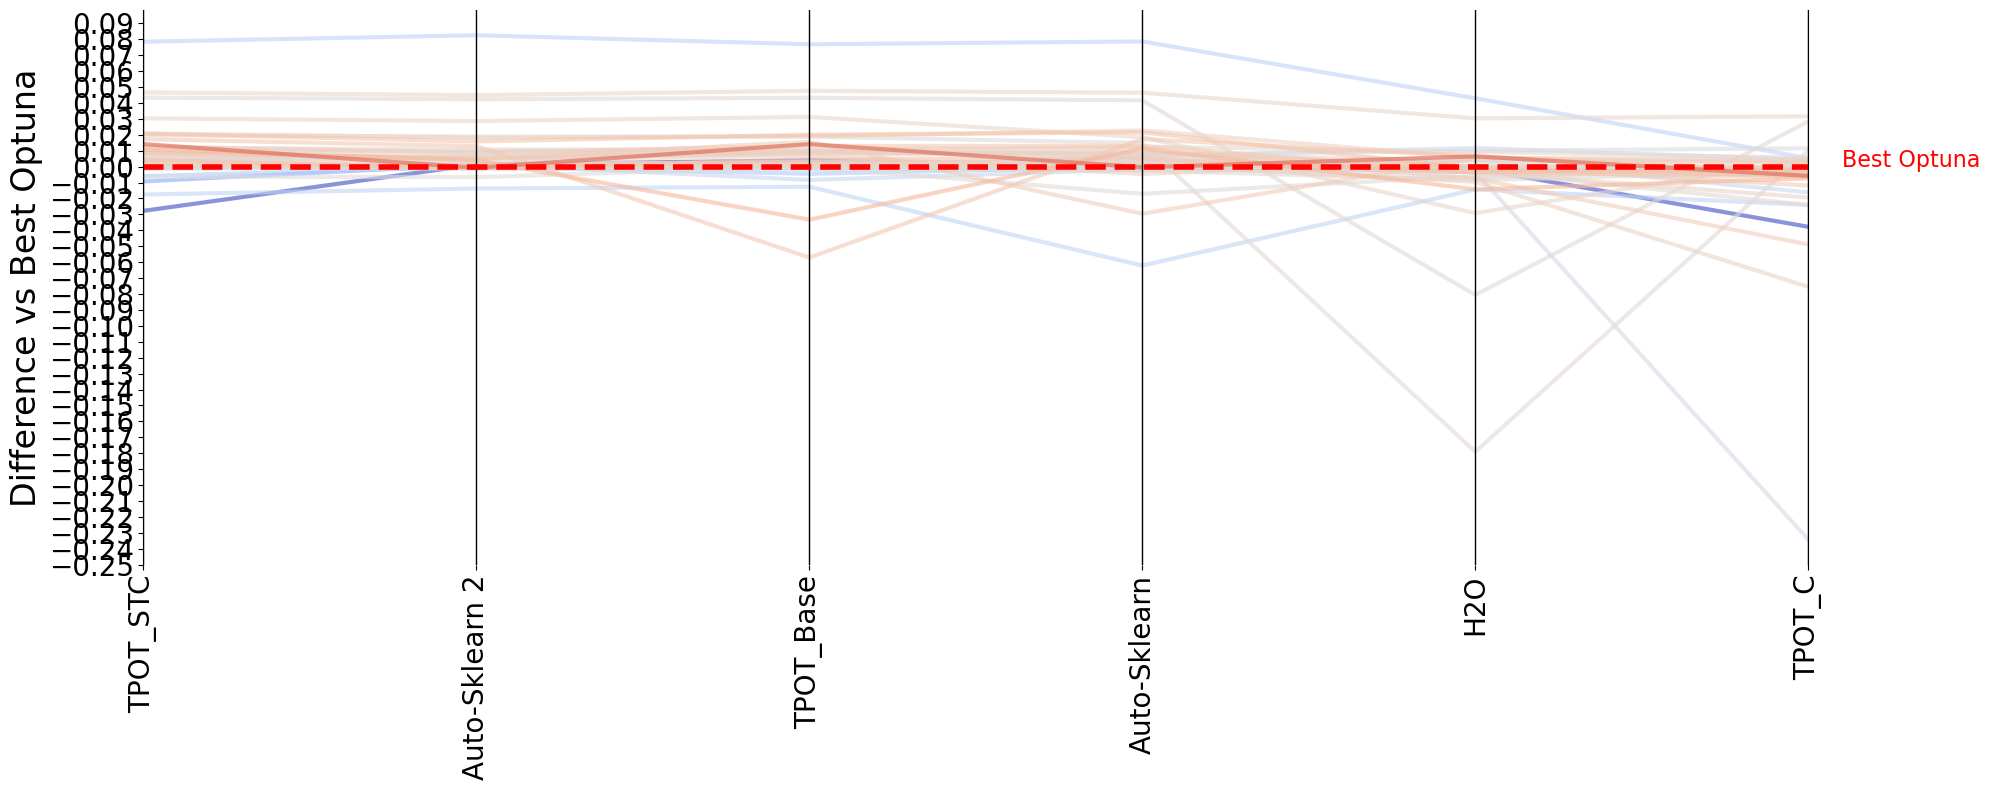

In [24]:
df=benchmark.data[['classifier','dataset','auroc']]
all_df = pd.concat([make_df(all_results_dict[exp_r][5]) for exp_r in experiments_to_plot_main])
all_df = pd.concat([df, all_df])

#piv = benchmark.data.pivot(columns='classifier', index='dataset', values='auroc')
piv_ml = all_df[all_df['classifier'].isin(optuna_list)].pivot(columns='classifier', index='dataset', values='auroc')
optuna_best = piv_ml.max(axis=1).reset_index().rename(columns={0:"auroc"})
optuna_best["classifier"] = "Best Optuna"

piv = optuna_best.pivot(columns='classifier', index='dataset', values='auroc')
all_df_piv = all_df.pivot(columns='classifier', index='dataset', values='auroc')


diffs = all_df_piv.subtract(piv["Best Optuna"],axis=0).unstack().reset_index(name="auroc")

automl_piv = diffs[diffs['classifier'].isin(automllist)].pivot(columns='classifier', index='dataset', values='auroc').reset_index(level=0)
automl_piv.set_index("dataset", drop=False, inplace=True)

color=[plt.cm.coolwarm(int(i)) for i in np.arange(0,256,256/40)]

#color option 1
tma = all_df_piv['TPOT_STC'] - all_df_piv['Auto-Sklearn 2']
s = tma.sort_values().index.tolist()
normed_tma = (tma - -0.02) / (0.02 - -0.02)
color=[plt.cm.coolwarm(int(i)) for i in normed_tma[s].values*256]


fig, ax = plt.subplots(figsize=(20, 8))
ax = pd.plotting.parallel_coordinates(
                                        automl_piv.loc[s],
                                        #automl_piv.sort_values("TPOT_STC"), 
                                        'dataset', 
                                        alpha=.6, linewidth=3,
                                        color=color,
                                        cols=list(reversed(automl_piv.mean(0).sort_values().index.to_list())))
ax.text(5.1, 0.00, "Best Optuna", color='red', fontsize=16)
#            plt.title("Performance of classifiers compared vs the method on DIGEN benchmark", fontsize=28)
ax.set_ylabel('Difference vs Best Optuna', fontsize=24)

#        ax.set_xticks(np.arange(0.0, 1.1, step=0.1))
#ax.set_xlabel("Classifiers", fontsize=24)

ax.set_yticks(np.arange(-0.5, 0.55, step=0.01))
ax.tick_params(axis='both', which='major', labelsize=20)

plt.plot([0, 6], [0, 0], color='red', linestyle='--', linewidth=4)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)
plt.xticks(rotation=90)


if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"automl_parallel_coords_from_optuna_colored_by_tpot_sk2_diff.svg"))
        fig.savefig(os.path.join(save_figs_folder,"automl_parallel_coords_from_optuna_colored_by_tpot_sk2_diff.pdf"))

In [25]:
automl_piv

classifier         dataset Auto-Sklearn Auto-Sklearn 2      H2O TPOT_Base  \
dataset                                                                     
digen10_8322  digen10_8322       0.0106         0.0183  -0.2991    0.0088   
digen11_7270  digen11_7270      -0.0001        -0.0002  -0.0001       0.0   
digen12_8322  digen12_8322       0.0002            0.0  -0.0003    0.0002   
digen13_769    digen13_769     -0.00015       -0.00015  0.00435    0.0045   
digen14_769    digen14_769       0.0009        -0.0006  -0.0048    0.0012   
...                    ...          ...            ...      ...       ...   
digen5_6949    digen5_6949      -0.0003        -0.0002   0.0036    0.0006   
digen6_466      digen6_466        0.003         0.0003   0.0022     0.003   
digen7_6949    digen7_6949       0.0034        -0.0001  -0.0044    0.0053   
digen8_4426    digen8_4426       0.0085        -0.0004   -0.005    0.0088   
digen9_7270    digen9_7270      -0.0176         0.0091   0.0116    0.0136   

classifier     TPOT_C TPOT_STC  
dataset                         
digen10_8322   0.0085   0.0182  
digen11_7270      0.0      0.0  
digen12_8322  -0.0026   0.0002  
digen13_769  -0.00385  0.01505  
digen14_769   -0.0755   0.0011  
...               ...      ...  
digen5_6949  -0.01065  -0.0046  
digen6_466    -0.0031   0.0029  
digen7_6949   -0.0311    0.004  
digen8_4426   -0.0119   0.0091  
digen9_7270    0.0032   0.0029  

[40 rows x 7 columns]

In [17]:
#color option 2
tma = automl_piv['TPOT_STC']
s = tma.sort_values().index.tolist()
normed_tma = (tma - min(tma)) / (max(tma) - min(tma))
normed_tma = (tma - -max(abs(tma))) / (max(abs(tma)) - -max(abs(tma)))
color=[plt.cm.coolwarm(int(i)) for i in normed_tma[s].values*256]


fig, ax = plt.subplots(figsize=(20, 8))
ax = pd.plotting.parallel_coordinates(
                                        automl_piv.loc[s],
                                        #automl_piv.sort_values("TPOT_STC"), 
                                        'dataset', 
                                        alpha=.8, linewidth=3,
                                        color=color,
                                        cols=list(reversed(automl_piv.mean(0).sort_values().index.to_list())))
ax.text(5.1, 0.00, "Best Optuna", color='red', fontsize=16)
#            plt.title("Performance of classifiers compared vs the method on DIGEN benchmark", fontsize=28)
ax.set_ylabel('Difference vs Best Optuna', fontsize=24)

#        ax.set_xticks(np.arange(0.0, 1.1, step=0.1))
#ax.set_xlabel("Classifiers", fontsize=24)
ax.set_yticks(np.arange(-0.5, 0.55, step=0.01))
ax.tick_params(axis='both', which='major', labelsize=20)

plt.plot([0, 6], [0, 0], color='red', linestyle='--', linewidth=4)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)
plt.xticks(rotation=90)

if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"automl_parallel_coords_from_optuna_colored_by_tpot.svg"))
        fig.savefig(os.path.join(save_figs_folder,"automl_parallel_coords_from_optuna_colored_by_tpot.pdf"))

NameError: name 'automl_piv' is not defined

In [21]:
automl_piv.mean(0).sort_values()

classifier
TPOT_C           -0.016647
H2O              -0.010032
TPOT_Base        -0.001294
Auto-Sklearn      0.000219
Auto-Sklearn 2    0.000801
TPOT_STC          0.000803
dtype: float64

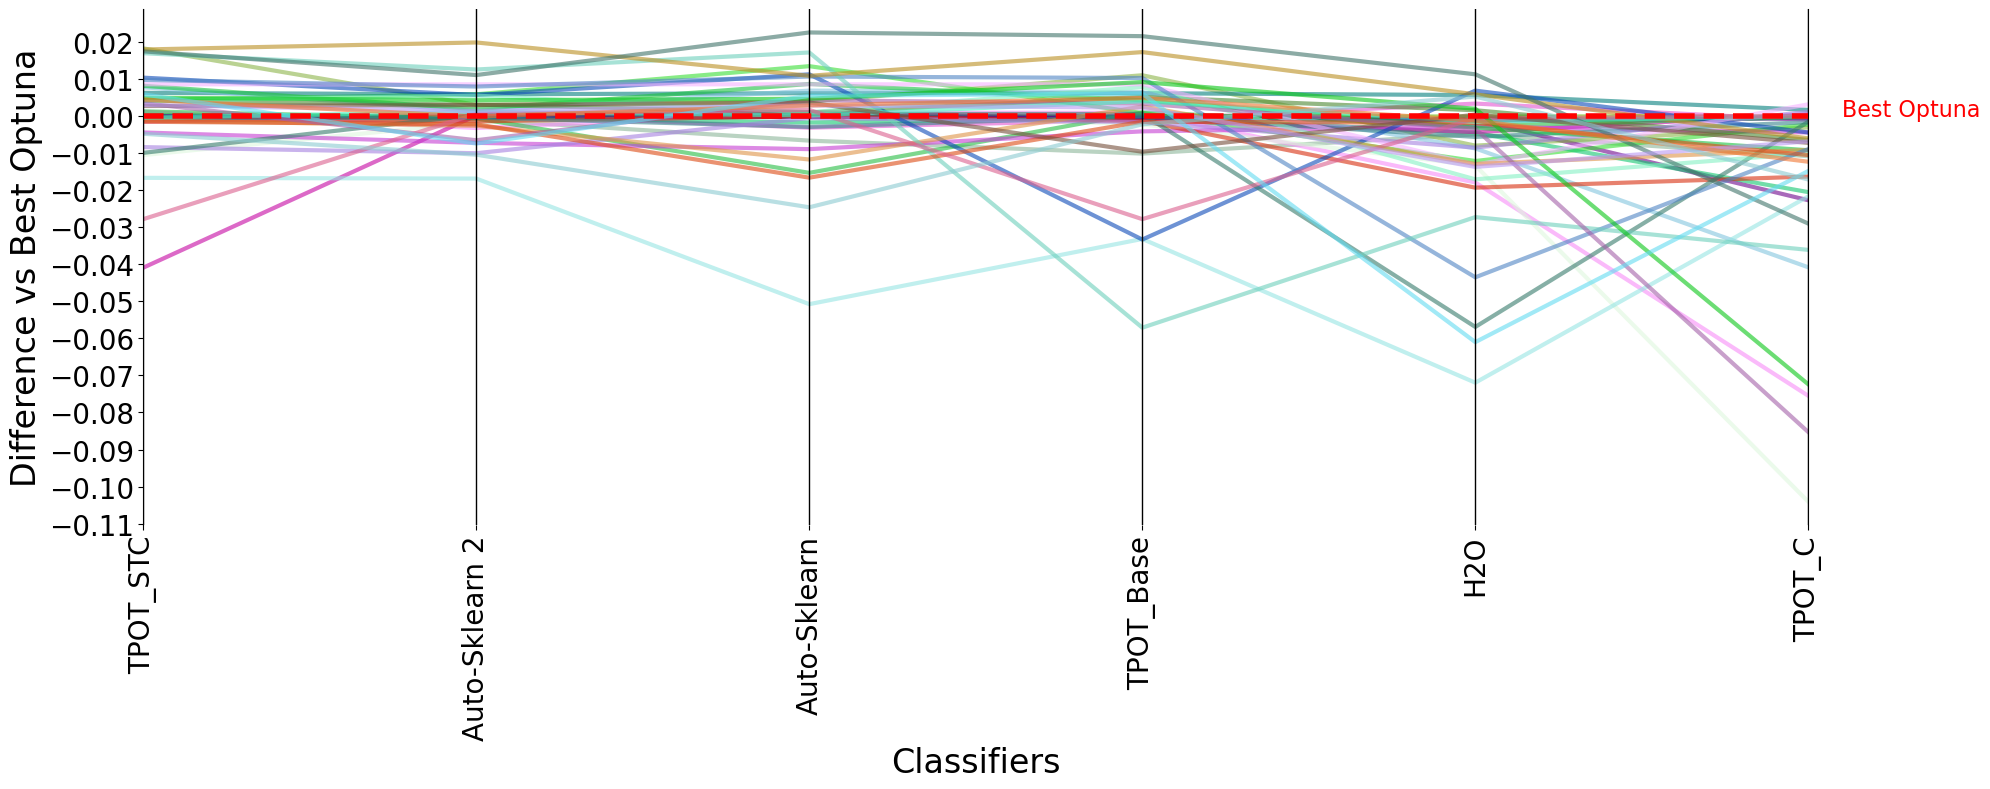

In [22]:
#color option 2

color=[plt.cm.rainbow(int(i)) for i in range(0,256,40)]


fig, ax = plt.subplots(figsize=(20, 8))
ax = pd.plotting.parallel_coordinates(
                                        automl_piv,
                                        #automl_piv.sort_values("TPOT_STC"), 
                                        'dataset', 
                                        alpha=.6, linewidth=3,
                                        #color=color,
                                        cols=list(reversed(automl_piv.mean(0).sort_values().index.to_list())))
ax.text(5.1, 0.00, "Best Optuna", color='red', fontsize=16)
#            plt.title("Performance of classifiers compared vs the method on DIGEN benchmark", fontsize=28)
ax.set_ylabel('Difference vs Best Optuna', fontsize=24)

#        ax.set_xticks(np.arange(0.0, 1.1, step=0.1))
ax.set_xlabel("Classifiers", fontsize=24)
ax.set_yticks(np.arange(-0.5, 0.55, step=0.01))
ax.tick_params(axis='both', which='major', labelsize=20)

plt.plot([0, 6], [0, 0], color='red', linestyle='--', linewidth=4)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)
plt.xticks(rotation=90)

if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"automl_parallel_coords_from_optuna_colored_random.svg"))

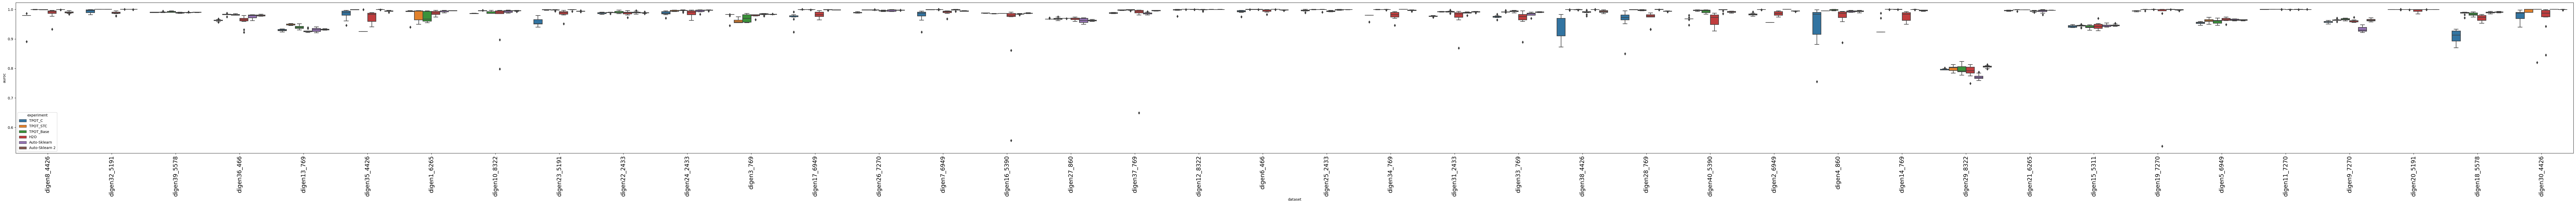

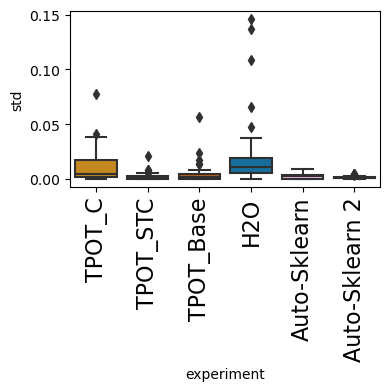

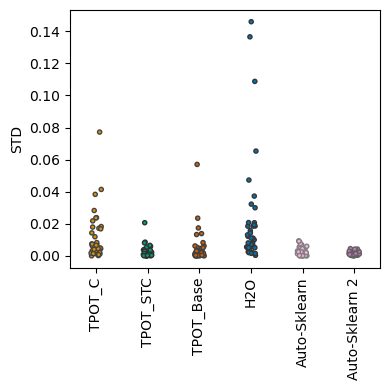

In [23]:
experiments_to_plot = ['TPOT_C', 'TPOT_STC', 'TPOT_Base', 'H2O', 'Auto-Sklearn'  , 'Auto-Sklearn 2' ]

all_df = pd.DataFrame()
for exp in experiments_to_plot:
    this_df = pd.concat([make_df(this_r )for this_r in all_results_dict[exp]])
    this_df['experiment'] = exp
    all_df = pd.concat([all_df, this_df])

fig,ax = plt.subplots(figsize=(100,8))
ax=sns.boxplot(data=all_df[all_df['experiment'].isin(experiments_to_plot)] , x='dataset', y='auroc', ax=ax, hue="experiment", hue_order=experiments_to_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()
if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"box_auroc_per_dataset_automl_main.svg"))

fig,ax = plt.subplots(figsize=(4,4))
all_df_std = all_df.groupby(["experiment","dataset"])['auroc'].agg(['mean','std']).reset_index()
ax=sns.boxplot(data=all_df_std[all_df_std['experiment'].isin(experiments_to_plot)] , x='experiment', y='std', palette=palette, order=['TPOT_C', 'TPOT_STC', 'TPOT_Base', 'H2O', 'Auto-Sklearn'  , 'Auto-Sklearn 2' ])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()
if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"box_std_per_dataset_automl_main.svg"))



fig,ax = plt.subplots(figsize=(4,4))
all_df_std = all_df.groupby(["experiment","dataset"])['auroc'].agg(['mean','std']).reset_index()
ax=sns.stripplot(data=all_df_std[all_df_std['experiment'].isin(experiments_to_plot)] , s=3, x='experiment', y='std', order=['TPOT_C', 'TPOT_STC', 'TPOT_Base', 'H2O', 'Auto-Sklearn'  , 'Auto-Sklearn 2' ], palette=palette, ec='k',linewidth=1, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)
plt.ylabel("STD",  fontsize=10)
plt.xlabel("")
plt.show()
if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"box_std_per_dataset_automl_main_strip.svg"))
    fig.savefig(os.path.join(save_figs_folder,"box_std_per_dataset_automl_main_strip.pdf"))

In [24]:
all_df_std.groupby("experiment").mean()

mean       std
experiment                        
Auto-Sklearn    0.983279  0.002715
Auto-Sklearn 2  0.984474  0.001458
H2O             0.971080  0.022436
TPOT_Base       0.981660  0.004836
TPOT_C          0.969008  0.011021
TPOT_STC        0.985319  0.002289

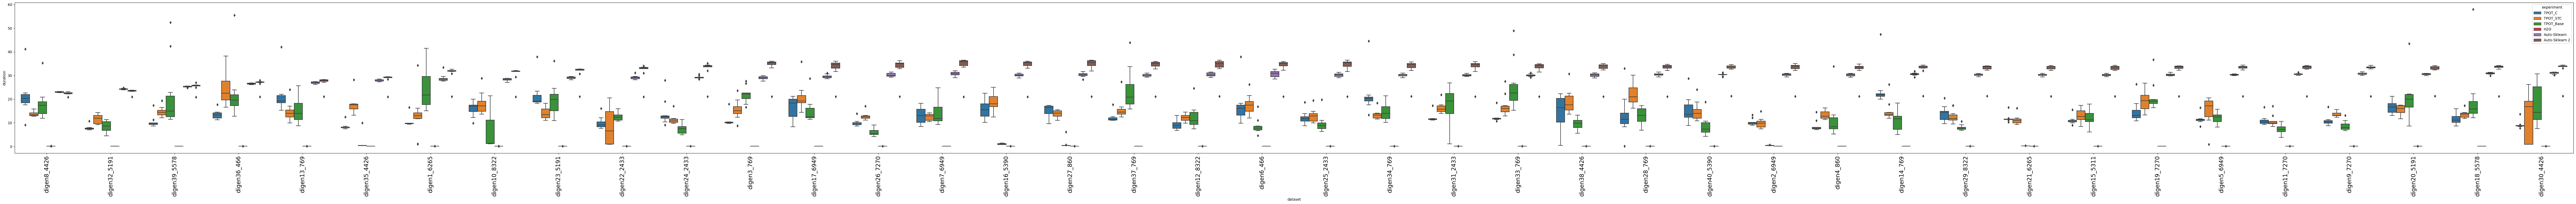

In [25]:
experiments_to_plot = ['TPOT_C', 'TPOT_STC', 'TPOT_Base', 'H2O', 'Auto-Sklearn'  , 'Auto-Sklearn 2' ]
        
all_df['duration'] = all_df['duration']/60000000000
fig,ax = plt.subplots(figsize=(100,8))
ax=sns.boxplot(data=all_df[all_df['experiment'].isin(experiments_to_plot)] , x='dataset', y='duration', ax=ax, hue="experiment", hue_order=experiments_to_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()
if save_figs_folder is not None:
    fig.savefig(os.path.join(save_figs_folder,"box_duration_per_dataset_automl_1200s.svg"))

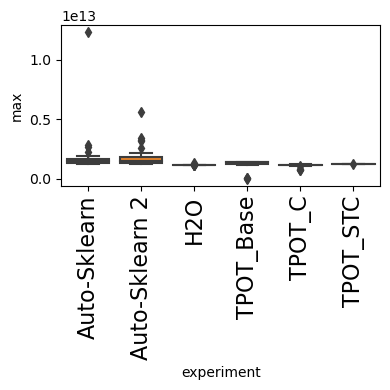

In [26]:
fig,ax = plt.subplots(figsize=(4,4))
all_df_std = all_df.groupby(["experiment","dataset"])['duration_clock'].agg(['max','mean','std']).reset_index()
ax=sns.boxplot(data=all_df_std[all_df_std['experiment'].isin(experiments_to_plot)] , x='experiment', y='max')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()


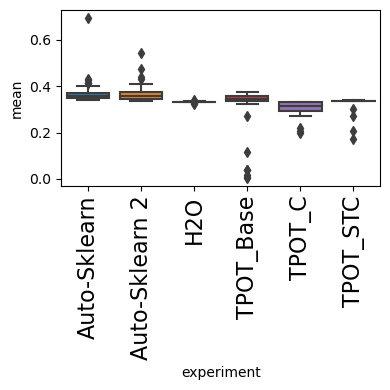

In [27]:
fig,ax = plt.subplots(figsize=(4,4))

all_df['duration_clock_scaled'] =  (all_df['duration_clock']/1e9)/60/60
all_df_std = all_df.groupby(["experiment","dataset"])['duration_clock_scaled'].agg(['max','mean','std']).reset_index()
ax=sns.boxplot(data=all_df_std[all_df_std['experiment'].isin(experiments_to_plot)] , x='experiment', y='mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()


In [25]:
from itertools import product
import seaborn as sns

experiments_to_plot = experiments_to_plot_main


optuna_methods =[   
                    'MLPClassifier',
                    'XGBClassifier',
                    'GradientBoostingClassifier',
                    'LGBMClassifier',
                    'SVC',
                    'RandomForestClassifier',
                    'KNeighborsClassifier',
                    'DecisionTreeClassifier',
                    'LogisticRegression',
                    ]

struggled_datasets = pd.DataFrame()  

#loop through run
for i in range(0,10):
    #add all results from this run
    all_df = benchmark.data #pd.DataFrame()
    for exp in [
                    'TPOT_C',
                    'TPOT_STC',
                    'TPOT_Base',
                    'Auto-Sklearn',
                    'Auto-Sklearn 2',
                    'H2O',
                    
                    ]:
        this_df = make_df(all_results_dict[exp][i])
        this_df['experiment'] = exp
        all_df = pd.concat([all_df, this_df])

    this_df = make_df(all_results_dict['MLPClassifier'][0])
    this_df['experiment'] = 'MLPClassifier'
    all_df = pd.concat([all_df, this_df])


    df = all_df.pivot('dataset', columns='classifier', values='auroc')
    #loop thorugh automl and optuna methods
    for alg1, alg2 in product([
                    'TPOT_C',
                    'TPOT_STC',
                    'TPOT_Base',
                    'Auto-Sklearn',
                    'Auto-Sklearn 2',
                    'H2O',
                    ], optuna_methods):

        #get list of datasets where automl alg did worst than a given ml alg
        alg1_lost_datasets = df.index[df[alg1] <= df[alg2]*.99].tolist()
        
        #add list of all ml algs/dataset pairs where automl lost
        if len(alg1_lost_datasets)>0:
            rows = [ {"alg": alg1,
                        "better_alg": alg2,
                        "run": i,
                        "datasets": dset} for dset in alg1_lost_datasets]
            
            struggled_datasets = pd.concat([struggled_datasets,pd.DataFrame.from_dict(rows)], ignore_index=True)


In [26]:
struggled_datasets

alg              better_alg  run      datasets
0    TPOT_C           MLPClassifier    0  digen10_8322
1    TPOT_C           MLPClassifier    0  digen12_8322
2    TPOT_C           MLPClassifier    0   digen14_769
3    TPOT_C           MLPClassifier    0  digen17_6949
4    TPOT_C           MLPClassifier    0  digen18_5578
..      ...                     ...  ...           ...
955     H2O  RandomForestClassifier    9  digen20_5191
956     H2O  RandomForestClassifier    9  digen29_8322
957     H2O  RandomForestClassifier    9   digen37_769
958     H2O    KNeighborsClassifier    9   digen37_769
959     H2O  DecisionTreeClassifier    9   digen37_769

[960 rows x 4 columns]

In [29]:
struggled_datasets.groupby(["alg"]).size()

alg
Auto-Sklearn       99
Auto-Sklearn 2     15
H2O               260
TPOT_Base         190
TPOT_C            307
TPOT_STC           89
dtype: int64

[  1   2   3   4   5   6   7   9  11  13  16  20  24  29  34  40  46  53
  60  69  78  87  96 106 116 126 136 146]
[  1   2   3   4   5   6   7   9  11  13  15  17  19  21  23  25  28  31
  34  37  40  43  47  51  55  59  63  69  75  82  89  96 106 116]
[ 1  2  4  8 13 19 26 35 44 54]
[ 1  2  4  8 13 21 31 41]
[ 1  2  4  7 15 24]
[ 1  2  3  5 14]


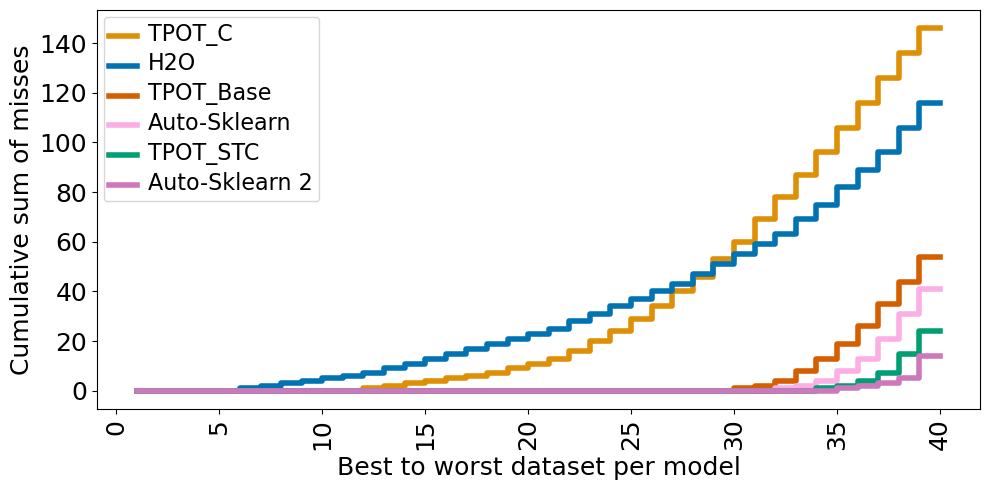

In [30]:

optuna_methods = [  'MLPClassifier',
                    'XGBClassifier',
                    'GradientBoostingClassifier',
                    'LGBMClassifier',
                    'SVC',
                    'RandomForestClassifier',
                    'KNeighborsClassifier',
                    'DecisionTreeClassifier',
                    'LogisticRegression',
                    ]


this_df = struggled_datasets.loc[struggled_datasets["better_alg"].isin(optuna_methods)]
#get all runs where an optuna method performed better (this counts number of algorithms that were better for this run)
grouped = this_df.groupby(["alg","datasets","run"]).size().reset_index().rename(columns={0:'count'})

#for each run, how many datasets is at least one optuna optimized method
#count the number of runs for that dataset where one was better (this counts the number of runs where the dataset appeared)
grouped = grouped.groupby(["alg","datasets"]).size().reset_index().rename(columns={0:'count'})
#grouped["count"] = grouped["count"]/10


fig,ax = plt.subplots(figsize=(10,5))
sns.color_palette('colorblind')
order = [       'TPOT_C',
                'H2O',
                'TPOT_Base',
                'Auto-Sklearn' ,
                'TPOT_STC',
                'Auto-Sklearn 2', 
                
                ]
                
for alg in order:
        a=np.zeros(40)
        y = np.cumsum(sorted(grouped[grouped['alg']==alg]['count'].tolist()))
        print(y)
        a[40-len(y):]=y
        #plt.plot(a, color=palette[alg])
        sns.lineplot(x=np.arange(40)+1,y=a,  drawstyle='steps-pre', label=alg, linewidth=4, color=palette[alg])

plt.xlabel("Best to worst dataset per model",fontsize=18)
plt.ylabel("Cumulative sum of misses",fontsize=18)
plt.xticks(rotation=90)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend


handles, labels = plt.gca().get_legend_handles_labels()
order = [4,2,3,0,5,1]
order = [5,4,3,]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.legend()

plt.setp(ax.get_legend().get_texts(), fontsize='16')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)
#plt.title("Percent runs AutoML was outperformed by at least one Optuna optimized method")
plt.show()
if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,"cummulative_misses.svg"))
        fig.savefig(os.path.join(save_figs_folder,"cummulative_misses.pdf"))



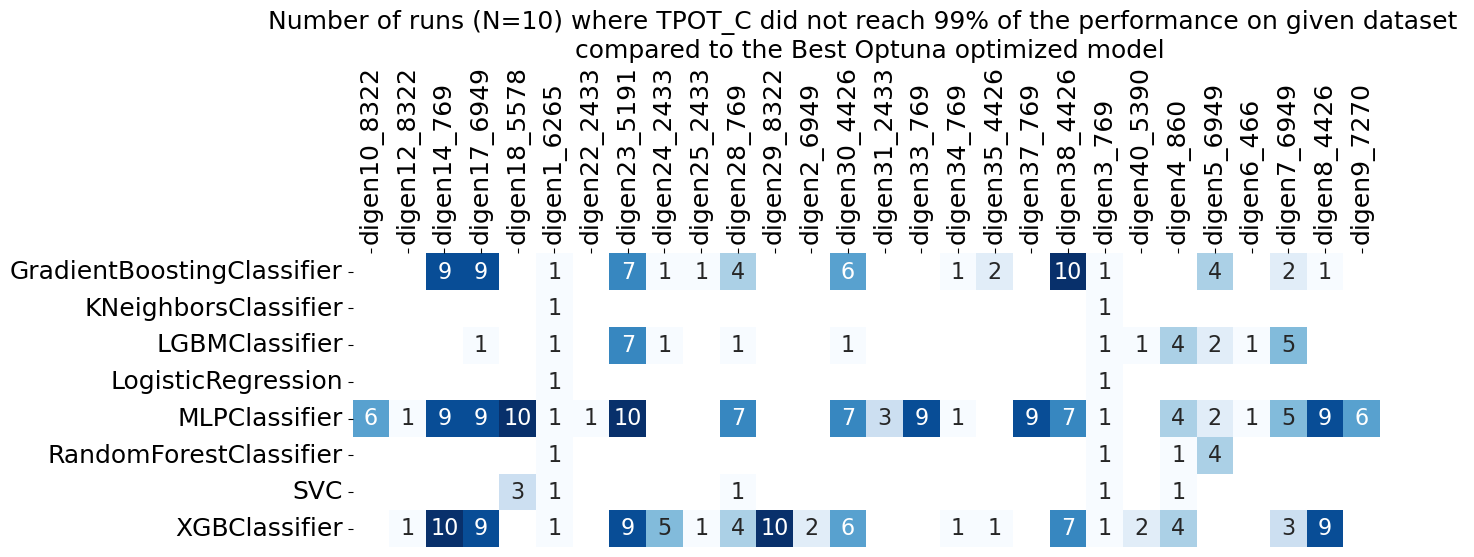

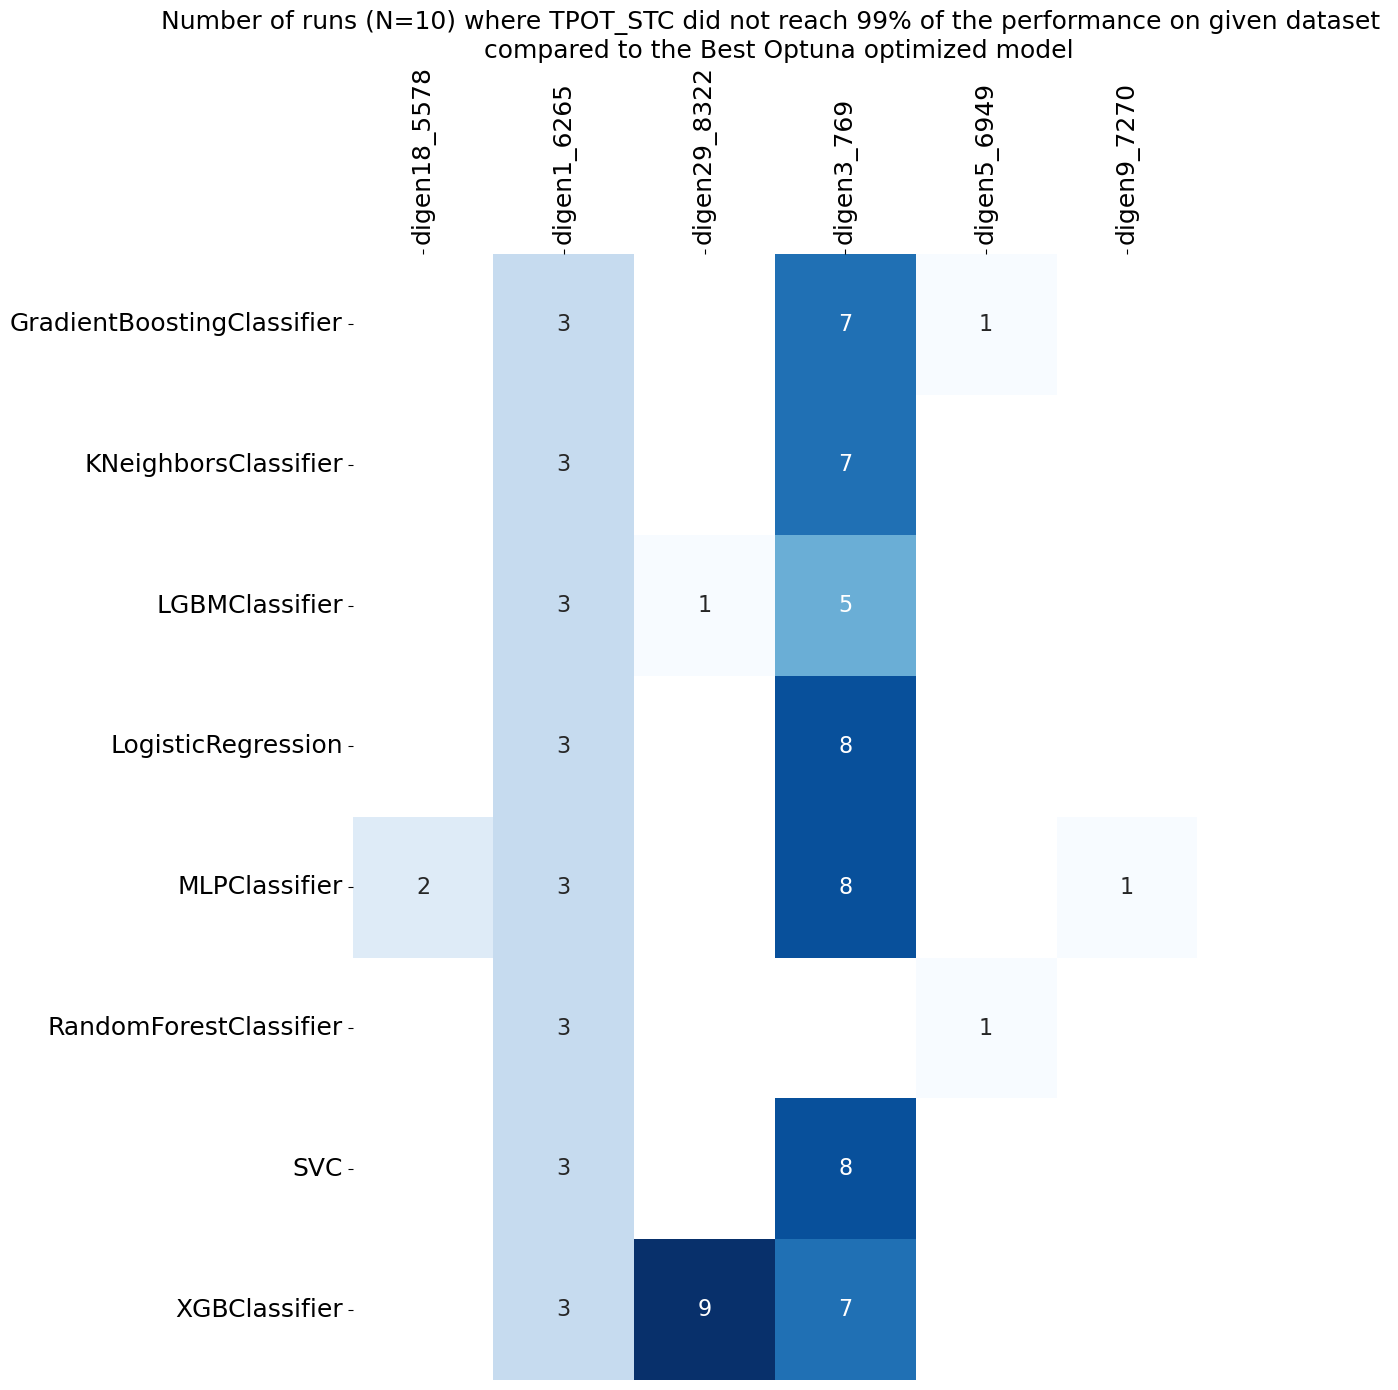

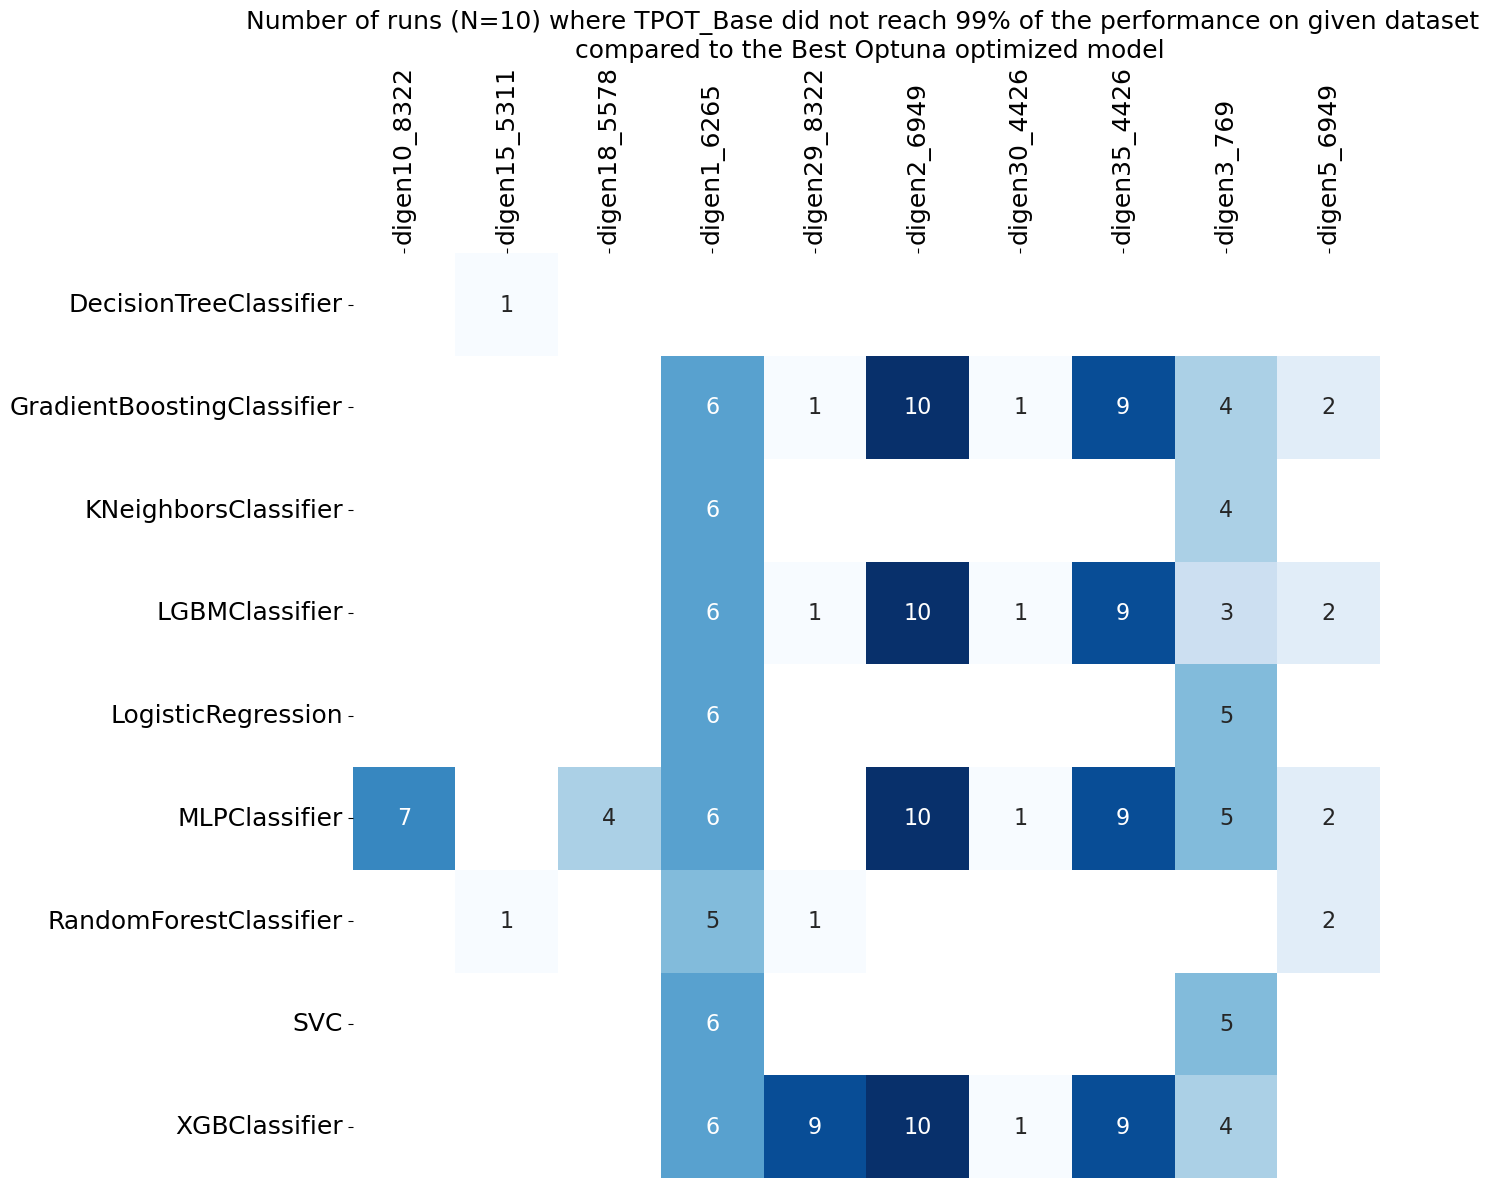

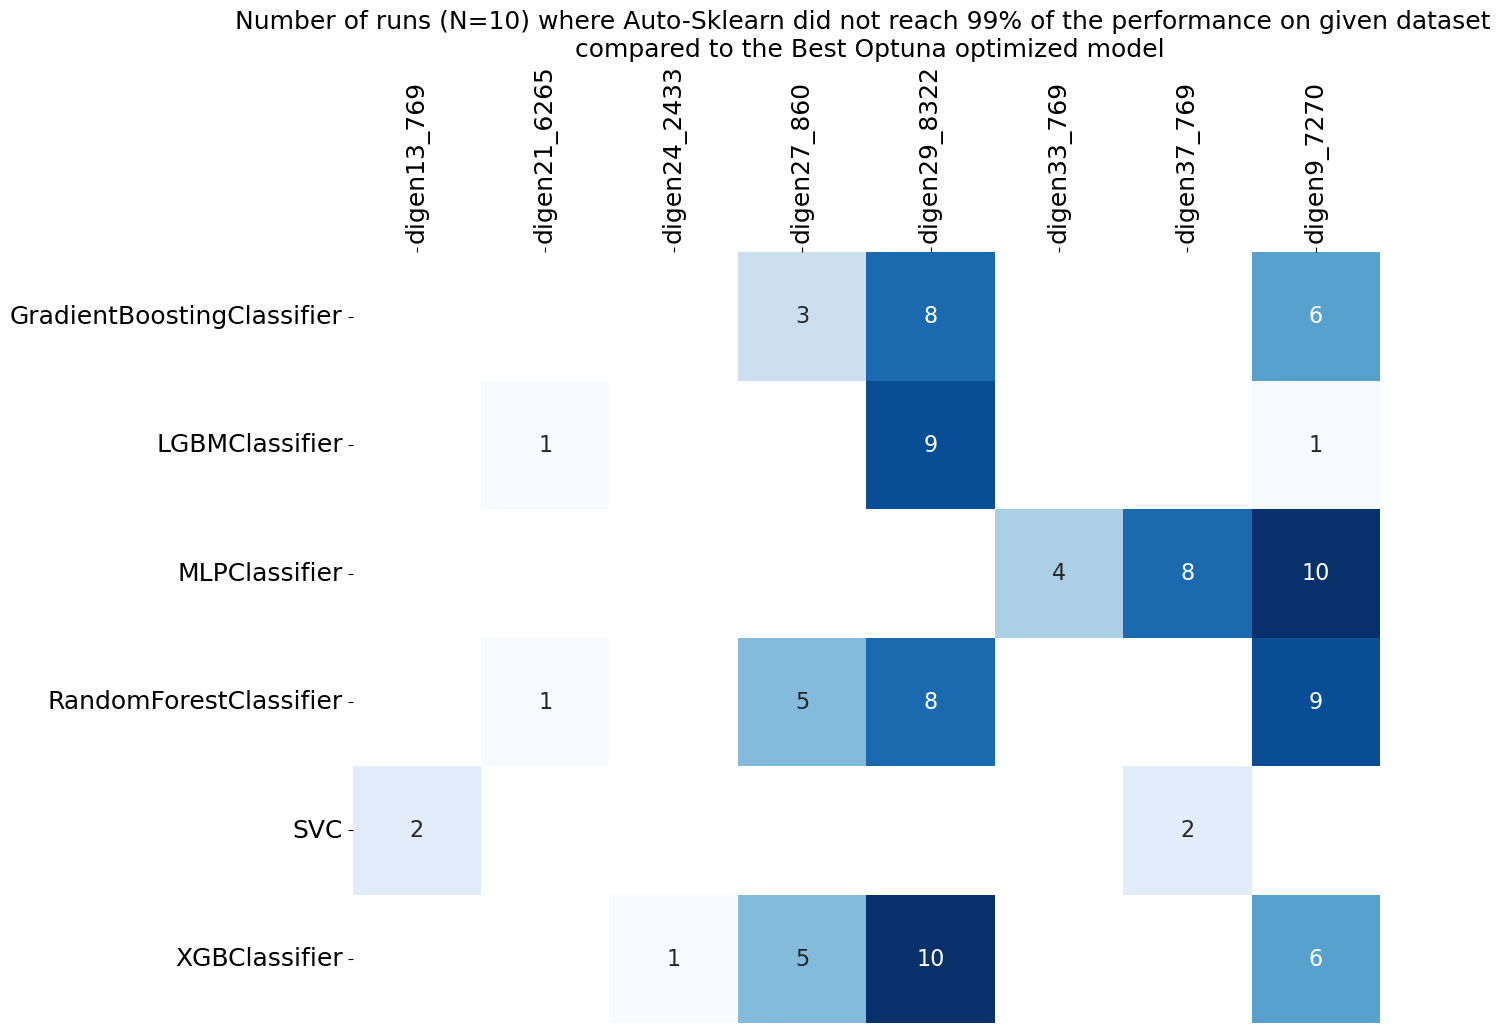

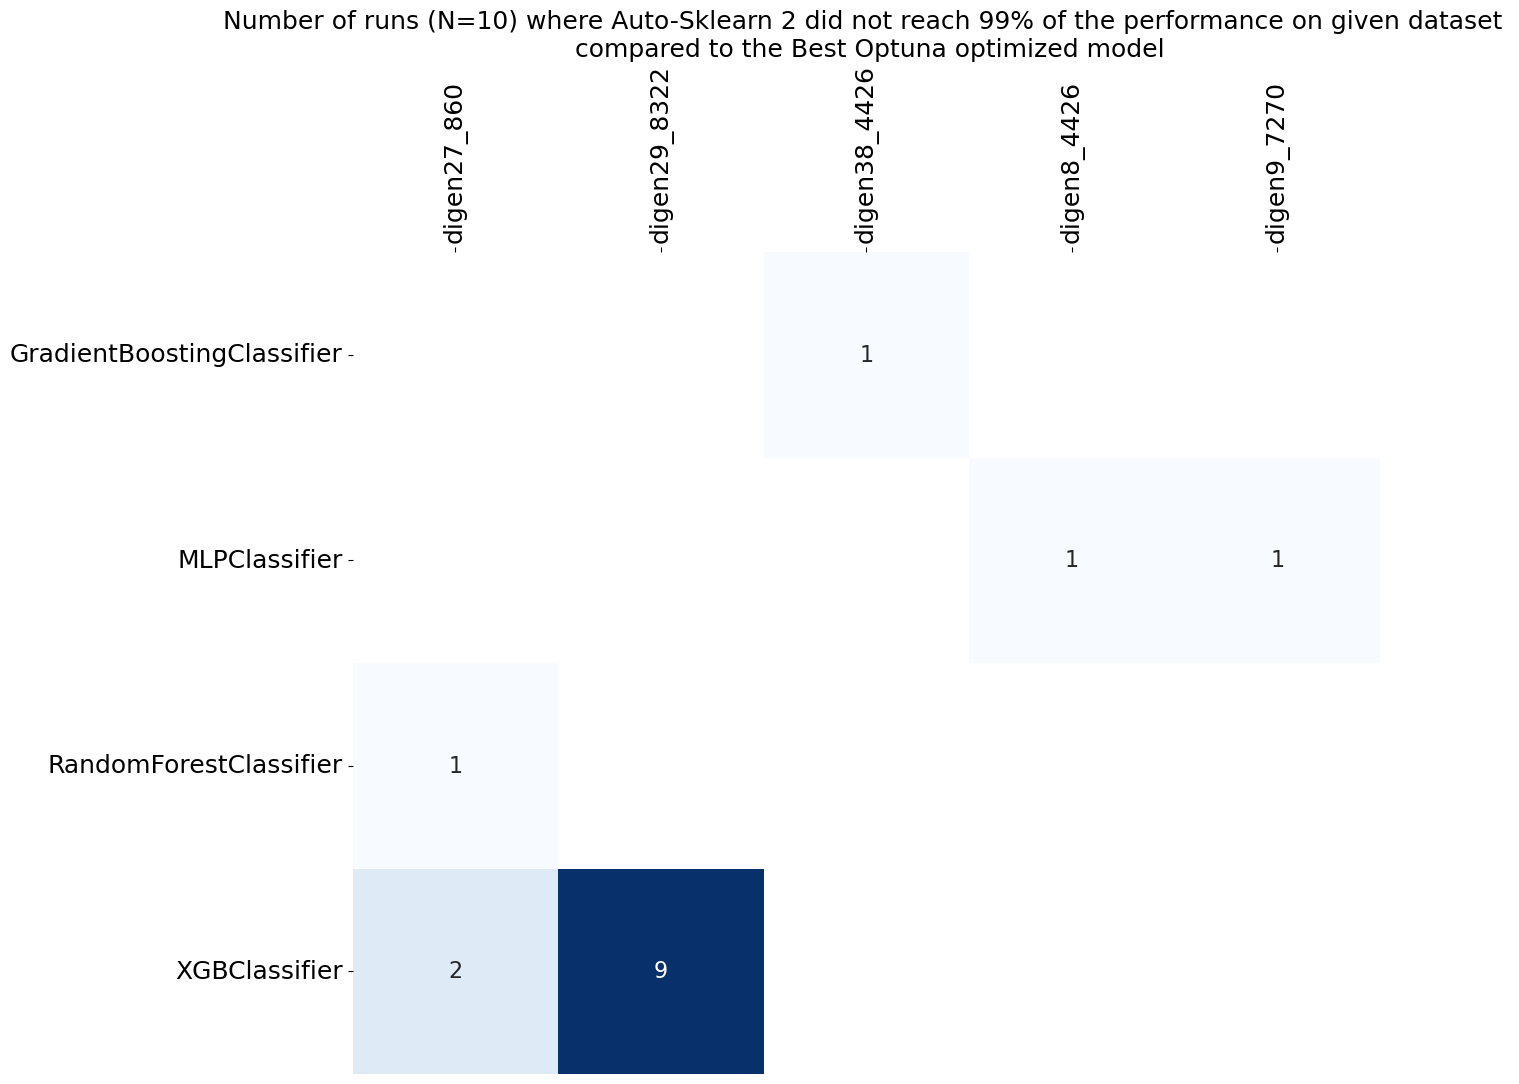

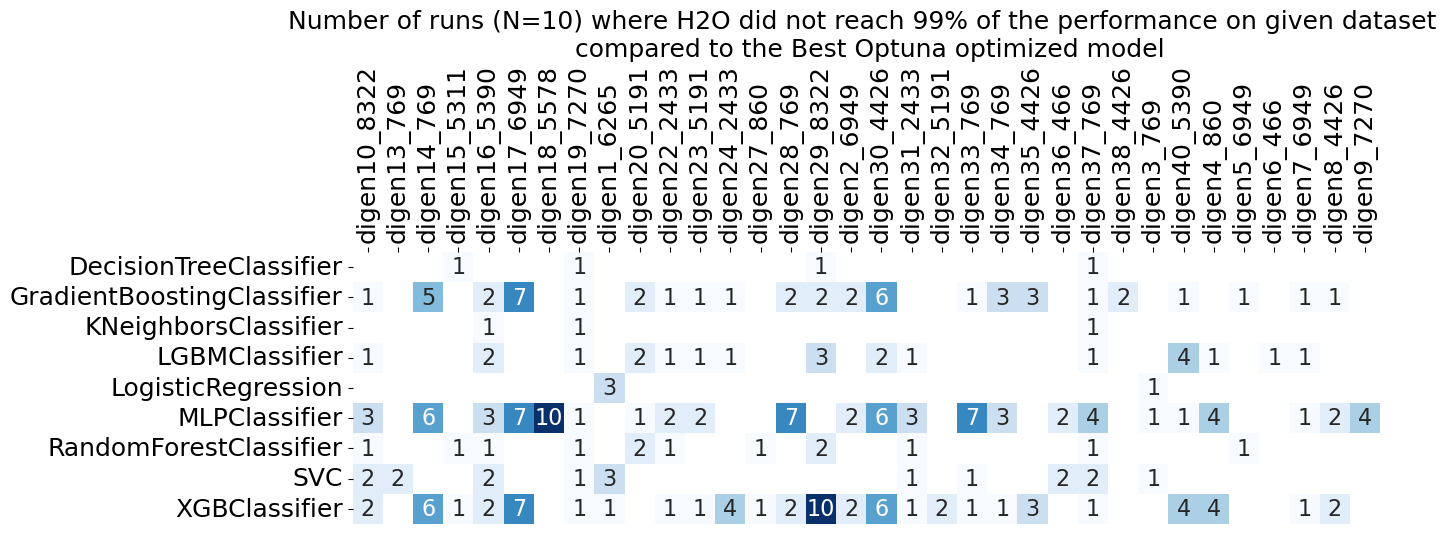

In [31]:
this_df = struggled_datasets.loc[struggled_datasets["better_alg"].isin(optuna_methods)]
grouped = this_df.groupby(["alg","better_alg","datasets"]).size().reset_index().rename(columns={0:'count'})

for automl_alg in [
                    'TPOT_C',
                    'TPOT_STC',
                    'TPOT_Base',
                    'Auto-Sklearn',
                    'Auto-Sklearn 2',
                    'H2O',
                    
                    ]:
    ptable = pd.pivot_table(grouped.loc[grouped["alg"]==automl_alg], index="better_alg", columns= "datasets", values="count", )

    fig = plt.figure(figsize=(14, 14))
    ax = sns.heatmap(data=ptable.astype(float), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')

    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel('')
    plt.ylabel('')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)
    plt.title(f"Number of runs (N=10) where {automl_alg} did not reach 99% of the performance on given dataset \n compared to the Best Optuna optimized model", fontsize=18)
    if save_figs_folder is not None:
        fig.savefig(os.path.join(save_figs_folder,f"{automl_alg}_vs_optuna.svg"))

In [32]:
all_df = pd.DataFrame()
for i in range(0,10):
    for exp in [
                    'TPOT_C',
                    'TPOT_STC',
                    'TPOT_Base',
                    'Auto-Sklearn',
                    'Auto-Sklearn 2',
                    'H2O',
                    
                    ]:
        this_df = make_df(all_results_dict[exp][i])
        this_df['experiment'] = exp
        all_df = pd.concat([all_df, this_df])

all_df = pd.concat([all_df, benchmark.data])
#get metric
scores = all_df.groupby(["classifier", "dataset"])[["auroc"]].median().reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(scores[scores["dataset"] == "digen13_769"].sort_values("auroc"))

                     classifier      dataset    auroc
283          LogisticRegression  digen13_769  0.59880
83       DecisionTreeClassifier  digen13_769  0.68160
203        KNeighborsClassifier  digen13_769  0.84790
243              LGBMClassifier  digen13_769  0.87050
323      RandomForestClassifier  digen13_769  0.87880
523               XGBClassifier  digen13_769  0.89280
123  GradientBoostingClassifier  digen13_769  0.90330
163                         H2O  digen13_769  0.92495
443                      TPOT_C  digen13_769  0.92920
43               Auto-Sklearn 2  digen13_769  0.93125
3                  Auto-Sklearn  digen13_769  0.93155
363                         SVC  digen13_769  0.93185
403                   TPOT_Base  digen13_769  0.93805
483                    TPOT_STC  digen13_769  0.94825


In [33]:
import glob
tpot_classifiers_to_load = [

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_STC_1200s',
                    
                    },
                    
                    ]

tpot_estimators_dict = {}
for exp in tpot_classifiers_to_load:
    results_arr = []
    for estimator_path in glob.glob(os.path.join(savepath,"digen_results",exp["automl"],exp["exp_name"],"**")):
        estimator_file = os.path.join(estimator_path,"estimators.pkl")
        results_file = os.path.join(estimator_path,"results.pkl")
        if os.path.exists(estimator_file):
            this_est = results=pickle.load(open(estimator_file,"rb"))
            results = results=pickle.load(open(results_file,"rb"))
            for dname in datasets_names:
                this_est[dname]['auroc'] = results[dname]['auroc']
            results_arr.append(this_est)

    tpot_estimators_dict[exp["exp_name"]] = results_arr

In [34]:
from turtle import width
import plotly.graph_objects as go
import plotly.express as px

def plot_tpot_models_array(all_tpot_results,color_bar=False):
    all_S = []
    all_T = []
    all_C = []
    all_STC = []
    all_STC_dict = {}
    #all_auroc = []
    for dname in datasets_names:
      for tpot_results in all_tpot_results:
          S = type(tpot_results[dname]['classifier'].steps[0][1]).__name__
          T = type(tpot_results[dname]['classifier'].steps[1][1]).__name__
          C = type(tpot_results[dname]['classifier'].steps[2][1]).__name__
          
          #auroc = tpot_results[dname]['auroc']

          all_S.append(S)
          all_T.append(T)
          all_C.append(C)
          stc = S+"_"+T+"_"+C
          all_STC.append(stc)
          #all_auroc.append(auroc)
          
          if stc in all_STC_dict:
            all_STC_dict[stc]['count'] += 1
          else:
            all_STC_dict[stc] = {}
            all_STC_dict[stc]['count'] = 1
            all_STC_dict[stc]["S"] = S
            all_STC_dict[stc]["T"] = T
            all_STC_dict[stc]["C"] = C

    all_STC = np.array(all_STC)
    sort_i = np.lexsort((all_T,all_S,all_C))
    sorted_unique = [all_STC[sort_i][index] for index in sorted(np.unique(all_STC[sort_i], return_index=True)[1])]

    color_dict = {label:idx for idx, label in enumerate(sorted_unique)}

    all_labels, idx = np.unique(all_STC, return_inverse=True)

    data = {"S": all_S,
            "T": all_T,
            "C": all_C,
            "label": idx ,
            "color": [color_dict[l] for l in all_STC],
            'one': np.ones(len(all_STC)), #debugging
            'range': np.arange(0,len(all_STC)),#debugging
            }#'all_auroc': all_auroc}

    df = pd.DataFrame(data)


    fig = px.parallel_categories(df, dimensions=["S","T","C"], labels={"S":"Selector","T":"Transformer","C":"Classifier"}, 
    color = 'color',
    color_continuous_scale=px.colors.sequential.Rainbow,
    range_color = None,
    )


    if not color_bar:
      fig.update_coloraxes(showscale=False)
    fig.update_layout(
          font=dict(
              size=20,  # Set the font size here
              ),
          )

    for d in fig.data[0].dimensions:
        d.values = ['<b>'+str(e)+'</b>' for e in d.values] 

    return fig

pad = 100
fig = plot_tpot_models_array([tpot_estimators_dict['tpot_STC_1200s'][0]])
fig.update_layout(width= 1000,
                  height = 400,
                  margin = {'l':120, 'r':200})
fig.show()
if save_figs_folder is not None:
    fig.write_image(os.path.join(save_figs_folder,"STC_models_first_1200s.svg",))
    fig.write_image(os.path.join(save_figs_folder,"STC_models_first_1200s.png"))
    fig.write_image(os.path.join(save_figs_folder,"STC_models_first_1200s.pdf"))

fig = plot_tpot_models_array(tpot_estimators_dict['tpot_STC_1200s'])
fig.update_layout(width= 1000,
                  height = 1300,
                  margin = {'l':150, 'r':240})
fig.show()
if save_figs_folder is not None:
    fig.write_image(os.path.join(save_figs_folder,"STC_models_all_1200s.svg"))
    fig.write_image(os.path.join(save_figs_folder,"STC_models_all_1200s.png"))
    fig.write_image(os.path.join(save_figs_folder,"STC_models_all_1200s.pdf"))
